#  PROJECT- FRAUD_DETECTION 

<font color="red">**Columns Information**</font>
- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. min - 1 and max - 95
- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
- amount - amount of the transaction in local currency.
- nameOrig - customer who started the transaction
- oldbalanceOrg - initial balance before the transaction (sender's balance before transaction)
- newbalanceOrig - new balance after the transaction. (sender's balance after transaction)
- nameDest - customer who is the recipient of the transaction 
- oldbalanceDest (reciever's balance) - initial balance of recipient before the transaction.
                                        Note that there is not information for customers that start with M (Merchants).
- newbalanceDest (reciever's balance) - New balance of recipient after the transaction. Note that there is not information for customers that start 
                                        with M (Merchants).
- isFraud (fraud detection)- This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent 
                             behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring 
                             to another account and then cashing out of the system.

<font color='sky blue'>**Column Value Information**<font>
- CASH-IN: Refers to depositing cash into an account, typically adding funds.
- CASH-OUT: Refers to withdrawing cash from an account, usually removing funds.
- DEBIT: This can have two meanings:-

          -It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense.
          -In accounting, it represents an entry that reduces assets or increases liabilities.

- PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.
- TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.

### Import Required Libraries

In [7]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting, hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Advanced classifiers
from sklearn.linear_model import LogisticRegression  # Simple baseline model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc # Evaluation metrics
from xgboost import XGBClassifier # Extreme Gradient Boosting
from xgboost import plot_importance,plot_tree
from sklearn.metrics import accuracy_score
import joblib  # Save models
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore") 

### Data Loading 

In [9]:
fd_df=pd.read_csv("E:\onedrive world\OneDrive\Desktop\CAPSTONE PROJECT -BIA\FRAUD DETECTION - DATASET\Fraud_Detection\Fraud_Analysis_Dataset.csv")

Dataframe name is fd_df

In [10]:
fd_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


- Dataset contains 11,142 rows (or records) and 10 columns (or attributes)

In [12]:
#Display tail of the dataset.
fd_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


In [13]:
fd_df.info() # Basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


- Each column has 11,142 Non-null entries, meaning there is no missing information in the dataset

In [15]:
fd_df.isnull().sum() # Check for missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

- No missing values in the dataset. Every row in every column has valid data.
- We can proceed to analysis without needing to handle null values.

In [17]:
missing_values= fd_df.isnull().sum()
missing_columns= missing_values
missing_columns 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [18]:
fd_df.groupby('type').count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
type,,,,,,,,,
CASH_IN,1951,1951,1951,1951,1951,1951,1951,1951,1951
CASH_OUT,1871,1871,1871,1871,1871,1871,1871,1871,1871
DEBIT,346,346,346,346,346,346,346,346,346
PAYMENT,5510,5510,5510,5510,5510,5510,5510,5510,5510
TRANSFER,1464,1464,1464,1464,1464,1464,1464,1464,1464


##### This output shows that the data has been grouped based on the type column, and the count of non-null values in each column has been calculated. It helps to see how many transactions there are for each type.
INSIGHTS:- 
- PAYMENT transactions account for the majority (55.1% of total).
- DEBIT transactions are rare (only 346 occurrences).
- CASH_IN and CASH_OUT have nearly equal distribution, indicating common financial activities.


In [20]:
 fd_df.describe() # Basic statistics

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


mean-
- step: Average is 8.717645 transaction/hr on an average (around step 9)

standard deviation- it Measures the spread or variability of the data around the mean(Higher values mean more variability).
- amount: it has  a standard deviation of 7.6 million, it means there’s a significant variation in transaction amounts. 
- oldbalanceOrg: it has a standard deviation of 2.14 million, which indicating large differences in customers balances before the transaction.

Min (Minimum)-smallest value in each column.
- step: The earliest transaction occurred at step 1.
- amount: The smallest transaction amount was 2.39 (probably an error or test transaction).
- oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest have 0, indicating accounts with no balance.

25% (First Quartile)-
- amount:  25% of transactions are below 494,661.8 
- oldbalanceOrg: 25% of customers had a balance below 427 before the transaction.

50% (Median)-middle value-
- amount: the median transaction value is 1.67 million.
- oldbalanceOrg: the median balance before transactions is 28,169.5.
- isFraud : the median is 0, meaning most transactions are not fraudulent.

75% (Third Quartile)- 
- amount: 75% of transactions are below 1.54 million.
- oldbalanceOrg: 75% of customers had balances below 304,085.5.

Max- largest value in each column.
- step: The last recorded transaction occurred at step 95.
- amount: The largest transaction was 10 million.
- oldbalanceOrg: The highest recorded balance before the transaction was 19.9 million.
- isFraud: The max value is 1, representing fraudulent transactions.

Basics insights of overall data -
- Amount= Average transaction amount is about 213k, but the max is 10 million, indicating a wide range of transaction sizes.
- oldbalanceOrg = many holders having zero balance, and average balance is 9.24 lakhs in account holders.
- newbalanceOrig = meadian value- this shows that after transaction, remaining balance in account holders will be very less or Zero.
- oldbalanceDest & newbalanceDest (RECIEVER'S BALANCE)= in recievers accounts many holders had zero balance, maximum balance is 3.46 crore , it means 
  there are big account holders.
- isFraud(Fraud Detection) = zero(0) means NO FRAUD / one(1)  means there is FRAUD, 10.2% transactions are fraudulent(Fraud) and Remaining trasaction 
                             are same, it means mostly transactions are safe. 

##### unique transaction types

In [23]:
# Check for unique transaction types
fd_df['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [24]:
fd_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [25]:
fd_df.shape

(11142, 10)

In [26]:
# Filter the DataFrame for rows where the 'type' column is either 'CASH_OUT' or 'TRANSFER'
fd_dfFltrd = fd_df[fd_df['type'].isin(['CASH_OUT', 'TRANSFER'])]

# Create a pivot table to count 'amount' grouped by 'type' and 'isFraud'
pivot_table = fd_dfFltrd.pivot_table(values='amount', index='type', columns='isFraud', aggfunc='count')

print(pivot_table)

isFraud      0    1
type               
CASH_OUT  1293  578
TRANSFER   900  564


##### Rows (type):
- 'CASH_OUT': Represents transactions where money was withdrawn.
- 'TRANSFER': Represents transactions where money was transferred.
##### Insights:
CASH_OUT Transactions:
   
    - Non-fraudulent: 1,293 transactions.
    - Fraudulent: 578 transactions.

TRANSFER Transactions:
  
    - Non-fraudulent: 900 transactions.
    - Fraudulent: 564 transactions.

##### balance_check

In [29]:
# Verify balances (e.g.oldbalanceOrg - amount = newbalanceOrg)
fd_df['balance_check'] = (fd_df['oldbalanceOrg'] - fd_df['amount']).round(2) == fd_df['newbalanceOrig']
fd_df['balance_check'].value_counts()

balance_check
False    6315
True     4827
Name: count, dtype: int64

<font color='sky blue'>**Insights-**<font>

Balance are mismatched 6315 transations
- it means oldbalanceOrg - amount = newbalanceOrg  is not equal 
Possible Reasons for Mismatch:
  Fraudulent transactions (balance intentionally changed). 
- Dummy data (e.g., missing or fake values). 
- System glitches in transaction processin.

4827 Transitions are correctly matched 
These are genuine Transactionsg

In [31]:
#Checking for unique value.

fd_df.nunique() 

step                 95
type                  5
amount            10565
nameOrig          11142
oldbalanceOrg      7806
newbalanceOrig     5914
nameDest           7508
oldbalanceDest     4531
newbalanceDest     2030
isFraud               2
balance_check         2
dtype: int64

In [32]:
fd_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balance_check
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,True
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,True
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,True
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,True
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,True


In [33]:
fd_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'balance_check'],
      dtype='object')

##### Drop unnecessary columns- 'balance_check'

In [35]:
# Drop unnecessary columns
fd_df = fd_df.drop(['balance_check'], axis=1)

In [36]:
fd_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [37]:
fd_df.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [38]:
fd_df.shape

(11142, 10)

### Exploratory Data Analysis (EDA)

### Univariate Analysis

##### Transaction Types- Distribution plot

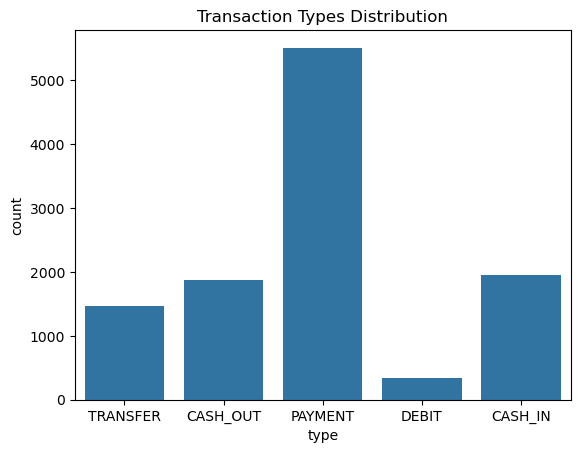

In [42]:
# Distribution of transaction types
sns.countplot(data=fd_df, x='type')
plt.title('Transaction Types Distribution')
plt.show()

x axis - it shows the  transactions types and also express the unique value which represents the different mode of transactions
y axis - it shows the count of type of transactions in the dataset.

 <font color='sky blue'>**Insights-**<font>
- dominant transaction type - Payment, this is the frequently type of transaction.it means in this dataset holders are accounts doing Payments
                              frequently  
- Other type - CASH_OUT and CASH_IN is the most common transactionb type.
-                    - TRANSFER is moderate 
                     - DEBIT is the rarest  or low transaction type 

#### Types of Transactions- Pie chart

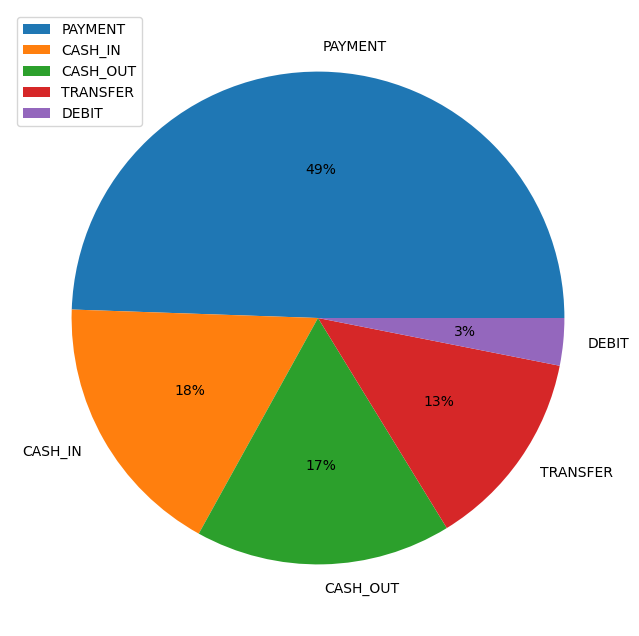

In [45]:
#Types of Transactions.
#Visualistion with piecharts.
type = fd_df['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

#### Count of fraud and Non Fraud Transaction.- Bar chart

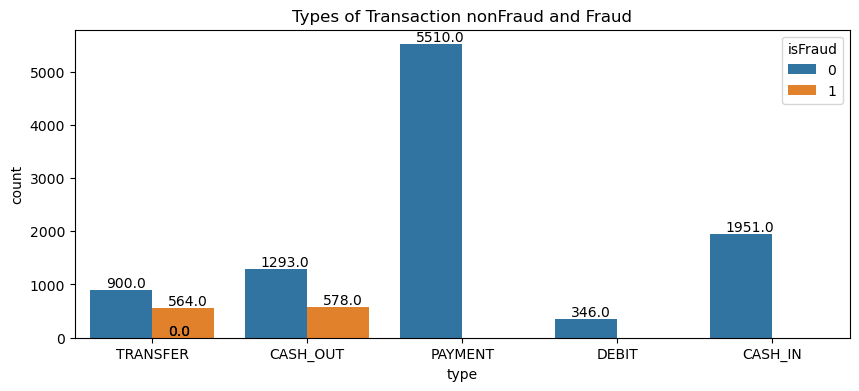

In [47]:
#Count of fraud and Non Fraud Transaction.
#Visualize through bar chart.
plt.figure(figsize=(10,4))
ax=sns.countplot(x = "type", hue="isFraud", data = fd_df)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

##### isfraud (Fraud vs Non-Fraud Transactions) - Bar chart

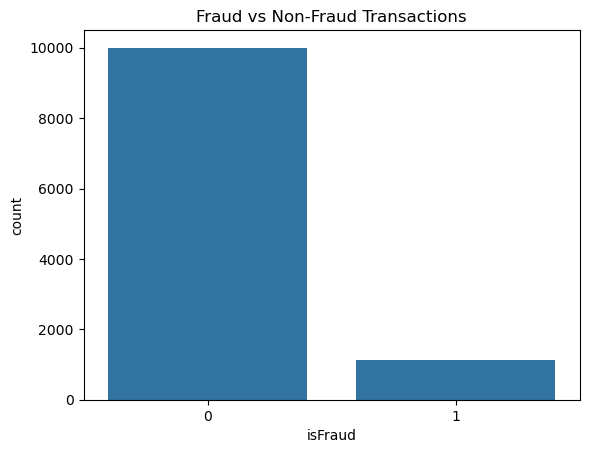

In [49]:
# Fraud vs Non-Fraud transactions
sns.countplot(data=fd_df, x='isFraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

<font color='sky blue'>**insights**<font>

0: Non-Fraudulent Transaction

1: Fraudulent Transaction

## Amount 
findings- 
1. Scatter Plot - of Amount Colored by Fraud Status .
2. Here we are - Analyze High-Value Transactions Separately. Through this and we will - Check the Amount, Transaction Type, and Fraud status.
3. Here we sort - the Top 10 Fraudulent Transactions by Amount and description separately 

##### 1) Scatter Plot - of Amount Colored by Fraud Status 

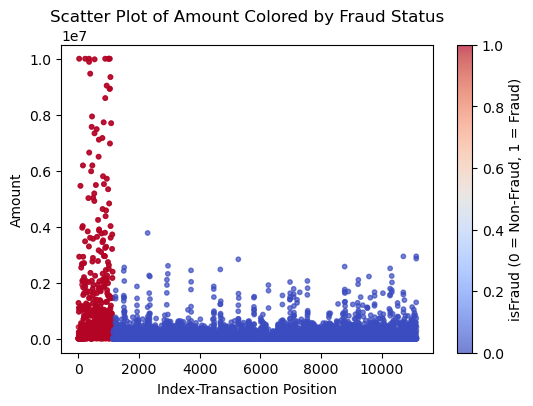

In [53]:
#Visualizing of outliers.
plt.figure(figsize=(6, 4))

# Scatter plot: Fraud transactions in red, Non-fraud in blue
plt.scatter(fd_df.index, fd_df['amount'],
           c=fd_df['isFraud'], cmap='coolwarm', s=10, alpha=0.7)


#Set labels and title.
plt.xlabel('Index-Transaction Position')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount Colored by Fraud Status')

# Adding color bar for fraud status
plt.colorbar(label='isFraud (0 = Non-Fraud, 1 = Fraud)')

#Show the plot
plt.show()

x-axis(index):    

      -  it is showing that which transaction is placed at which position in the data set.
      -  the index initially started at 0 (zero) which has grown to 10,000 .

y-axis (amount): 

      - it is showing transaction amount.
      - All the dots is showing transaction amount's size.          
      - The amounts are small which closer to 0, and the higher you go, the larger the amount.  

Graphs overview- 
1) Points close to the bottom line:
      - There are a lot of dots tightly packed at the bottom of the graph, meaning a lot of the transactions have small amounts (close to 0). 
means -  most of the transactions are low value.
2) A few dots at the top (outliers):
      - Few points towards the top of the graph, clearly far away from the rest. 
      - This shows that some transactions have very high amounts. 
      - These are called outliers because they stand out from the rest of the data.
3) High-value points at the beginning:
      - A concentration of dots has started, the index values ​​are high, and the points at the top appear to be the same.
      - That is, some large transactions occurred in earlier rows or at the beginning of the data.

 


#### Visualisation of Fraud Transactions- CASH_OUT and TRANSFER - Bar chart 

type
CASH_OUT    50.61296
TRANSFER    49.38704
Name: count, dtype: float64


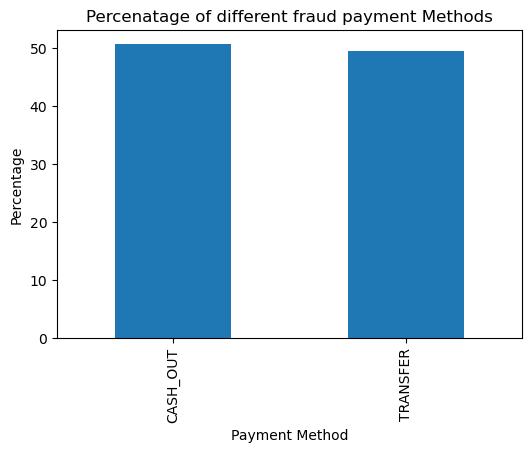

In [56]:
#Visualisation of Fraud Transactions.
fraud_df = fd_df[fd_df['isFraud'] == 1]
legit_df = fd_df[fd_df['isFraud'] == 0]

payment_counts_fraud = fraud_df['type'].value_counts()
payment_percentages_fraud = (payment_counts_fraud/payment_counts_fraud.sum())*100

print(payment_percentages_fraud)
plt.figure(figsize=(6,4))
payment_percentages_fraud.plot(kind='bar')

plt.xlabel('Payment Method')
plt.ylabel("Percentage")
plt.title("Percenatage of different fraud payment Methods")

plt.show()

#### 2) Here we are analyze high-value transactions separately. Through this and we will check the amount, transaction type, and fraud status

High-Value Transactions:
       step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
7         1  TRANSFER  1277212.77  C1334405552     1277212.77             0.0   
8         1  CASH_OUT  1277212.77   C467632528     1277212.77             0.0   
16        2  TRANSFER  1096187.24  C1093223281     1096187.24             0.0   
17        2  CASH_OUT  1096187.24    C77163673     1096187.24             0.0   
18        2  TRANSFER   963532.14  C1440057381      963532.14             0.0   
...     ...       ...         ...          ...            ...             ...   
11074     7  TRANSFER   929560.40  C1329505805      150562.57             0.0   
11103     7  TRANSFER   836758.63  C1563466959       84860.00             0.0   
11131     7  TRANSFER  1298848.87  C1053035032        8439.13             0.0   
11133     7  TRANSFER  2943845.35  C1360289756           0.00             0.0   
11134     7  TRANSFER  2861134.92  C1326904973           0.00             0.0   

  

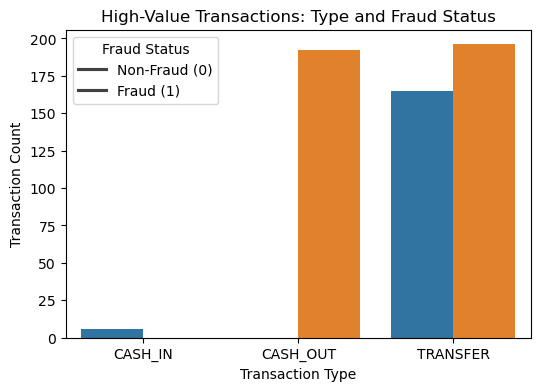

In [58]:
# Set threshold for high-value transactions
high_value_threshold = fd_df['amount'].quantile(0.95)  # Top 5% of amounts

# Filter high-value transactions
high_value_transactions = fd_df[fd_df['amount'] >= high_value_threshold]

# Display the high-value transactions DataFrame
print("High-Value Transactions:")
print(high_value_transactions)

# Group by 'type' and 'isFraud' to analyze transaction types and fraud status
high_value_summary = high_value_transactions.groupby(['type', 'isFraud'])['amount'].count().reset_index()

# Rename the column for clarity
high_value_summary.rename(columns={'amount': 'Transaction_Count'}, inplace=True)

# Display summary of high-value transactions
print("\nHigh-Value Transactions Summary:")
print(high_value_summary)

# Optional: Visualize high-value transactions by transaction type and fraud status

plt.figure(figsize=(6, 4))
sns.barplot(data=high_value_summary, x='type', y='Transaction_Count', hue='isFraud')

# Add labels and title
plt.title('High-Value Transactions: Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud Status', labels=['Non-Fraud (0)', 'Fraud (1)'])

# Show the plot
plt.show()

X-Axis (Transaction Type): 
                - it is showing what type of transactions  are there (CASH_IN, CASH_OUT, TRANSFER) 
Y-Axis (Transaction Count):  
                - it is  showing transaction count, i.e. how many times each transaction type has occurred, along with the fraud status.

Bars Colors:

 - Orange Bar: Represents Non-Fraud (0) transactions.
 - Blue Bar: Represents Fraud (1) transactions.

Summary Table:  
- This is showing that - in  CASH_OUT  -  192 - non- fraud transactions ,
                                       -  165 - fraud transactions.
GRAPHS INSIGHTS -
 - CASH_OUT and TRANSFER types has more  fraudulent transactions.
 - CASH_IN has relatively less fraud cases , because  its has count (6 frauds only ).

#### 3) Here we sort the top 10 fraudulent transactions by amount and description separately:

In [61]:
# Filter only fraudulent transactions (isFraud == 1)
fraud_transactions = fd_df[fd_df['isFraud'] == 1]

# Sort fraudulent transactions by 'amount' in descending order
top_fraud_transactions = fraud_transactions.sort_values(by='amount', ascending=False)

# Display the top fraudulent transactions
print("Top Fraudulent Transactions:")
print(top_fraud_transactions.head(10))  # Display top 10 fraudulent transactions

Top Fraudulent Transactions:
      step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
988     82  TRANSFER  10000000.0  C1237313447     11000000.0       987591.59   
28       4  TRANSFER  10000000.0     C7162498     12900000.0      2930418.44   
1015    84  CASH_OUT  10000000.0   C824646662     10000000.0            0.00   
227     19  TRANSFER  10000000.0   C416779475     11900000.0      1861008.32   
228     19  CASH_OUT  10000000.0  C2050703310     10000000.0            0.00   
887     72  CASH_OUT  10000000.0  C1438388258     10000000.0            0.00   
1014    84  TRANSFER  10000000.0   C792651637     14800000.0      4830219.15   
886     72  TRANSFER  10000000.0    C53057884     18600000.0      8594065.09   
989     82  CASH_OUT  10000000.0  C1079335762     10000000.0            0.00   
29       4  CASH_OUT  10000000.0   C351297720     10000000.0            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  
988   C1468356154            

Top 10 fraudulent transactions :-  
1) Top Fraudulent Transaction Amount :
 -  All the top 10 fraudulent transactions have amount of -  10,000,000 , which indicates that high-value transactions are primarily involved in fraud.
    
2) Transaction Type: 
 - top fraudulent transactions include both TRANSFER and CASH_OUT
 - it shows that fraud is happening in both these transaction types , with no single type dominating. 

3) Fraudulent Account Details: 
 - Each row contains detailed information about the originating and destination account names (e.g., nameOrig and nameDest). This can help in -identify 
   suspicious accounts involved in fraudulent activities.

4) Account Balances :
 - old and new balances are shown for both the originating and destination accounts.
 - In most cases, the balance in the originating account remains unchanged (or drops to 0 in the case of cash-outs), while the destination accounts 
   often show substantial amounts, which is typical in fraudulent activity.

In [65]:
#Find outliers using IQR method.
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'amount'
Q1 = fd_df['amount'].quantile(0.25)  # 25% value -  before data. 
Q3 = fd_df['amount'].quantile(0.75)  # value of data after 75% od data .

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1  # This is the spread between the data.

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR  # lower bound calculation - indentify low extreme values through this.
upper_bound = Q3 + 1.5 * IQR  # upper bound calculation - indentify high extreme values through this.

# Identify outliers- we use this to filter out rows whose quantity is less than or outside the upper limit.
outliers = fd_df[(fd_df['amount'] < lower_bound) | (fd_df['amount'] > upper_bound)] 

# Print outliers
print("Outliers:")
print(outliers)

Outliers:
       step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
6         1  CASH_OUT   416001.33   C749981943           0.00             0.0   
7         1  TRANSFER  1277212.77  C1334405552     1277212.77             0.0   
8         1  CASH_OUT  1277212.77   C467632528     1277212.77             0.0   
16        2  TRANSFER  1096187.24  C1093223281     1096187.24             0.0   
17        2  CASH_OUT  1096187.24    C77163673     1096187.24             0.0   
...     ...       ...         ...          ...            ...             ...   
11131     7  TRANSFER  1298848.87  C1053035032        8439.13             0.0   
11132     7  TRANSFER   731485.29   C751320808           0.00             0.0   
11133     7  TRANSFER  2943845.35  C1360289756           0.00             0.0   
11134     7  TRANSFER  2861134.92  C1326904973           0.00             0.0   
11139     7  CASH_OUT   423159.63    C61395726      127891.14             0.0   

          nameDes

In [68]:
# fd_df = fd_df[~fd_df['amount'].isin(outliers['amount'])] - to drop the outliners  

In [73]:
#Outliers shapes
outliers.shape

(1172, 10)

1172 rows : 
   
    - 1,172 individual transactions identified as outliers in your dataset

10 columns :
    
    - These outlier transactions have - 10 different features or variables associated with them,
      which could include attributes like transaction type, amount, originating and destination account details, and more

In [80]:
#Fraud  Transaction Outliers.
print(len(outliers[outliers.isFraud ==1]))

545


In [81]:
# non-Fraud  Transaction Outliers.
print(len(outliers[outliers.isFraud ==0]))

627


##### Checking of legit & Fraud Transactions.

In [83]:
#Checking of legit & Fraud Transactions.
legit = len(fd_df[fd_df.isFraud == 0])
fraud = len(fd_df[fd_df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions:{:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions:{:.4f} %".format(fraud_percent))

Number of Legit transactions:  10000
Number of Fraud transactions:  1142
Percentage of Legit transactions:89.7505 %
Percentage of Fraud transactions:10.2495 %


### isFraud

#### Visualisation with - Pie Chart.

([<matplotlib.patches.Wedge at 0x1bcfd948f50>,
 [Text(-1.0434656010636294, 0.3481085166969042, ''),
  Text(1.0434655929155612, -0.3481085411209795, '')],
 [Text(-0.5691630551256159, 0.1898773727437659, '89.750%'),
  Text(0.5691630506812151, -0.18987738606598878, '10.250%')])

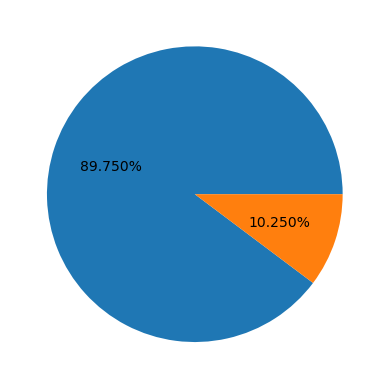

In [86]:
#Visualisation with  pie chart.
plt.pie(fd_df['isFraud'].value_counts(), autopct='%.3f%%')

##### Transaction Amount -histoplot

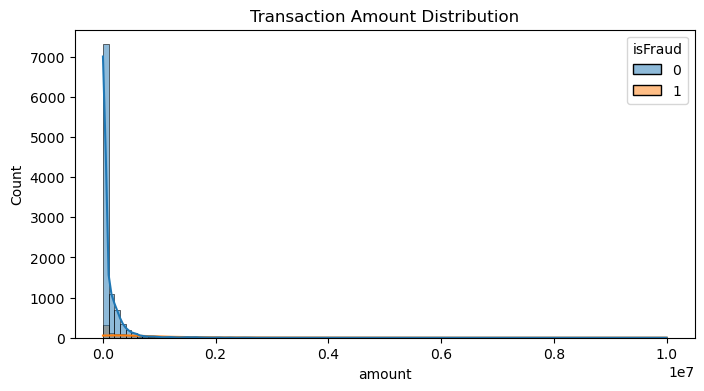

In [93]:
# Amount distribution for fraud and non-fraud transactions
plt.figure(figsize=(8, 4))
sns.histplot(data=fd_df, x='amount', hue='isFraud', bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

- x axis - it represent the transaction amount which is in range of 0 to 10 million )
- y axis - it shows that how many transactions are come in range of specific amount 
- Blue color (isFraud = 0)- showing distribution of non fraud transactions  
- orange color (isFraud = 1)- showing distribution of fraud transactions 
- observation- amount scale is very wide (0 to 10 million) but majority transactions amount are very     small , so due to this data is heavily skewed (towards left side)

##### Transaction amount -Kernel Density Estimate (KDE) plot

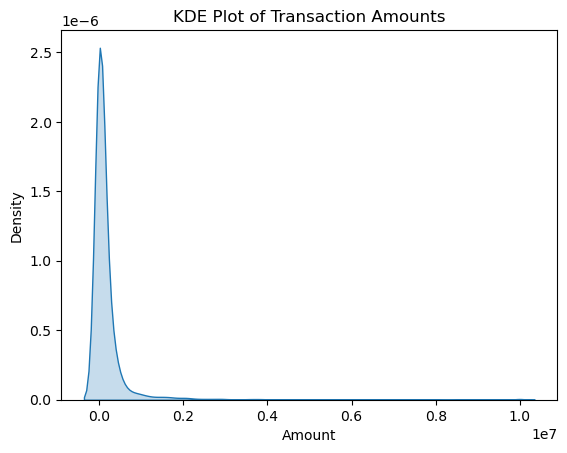

In [99]:
sns.kdeplot(fd_df['amount'], fill=True)
plt.title("KDE Plot of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.show()

Here KDE plot showing the  density of the amount variable in the dataset .
x-axis -it represent the (amount) 
y-axis - it is showing the (density) or likelihood of transactions amount with in he dataset 
Curves showing - 
- sharp peak near zero :  most transactions involve small amounts.
- long tail to the right : There are fewer transactions with large amounts, which suggests a rightskewed distribution.

<font color='sky blue'>**insight**<font>
- Majority of the transactions happening in the dataset occur within a low range of amounts.
- Outliers or rare events (like very high transaction amounts) exist but are infrequent.
- Most transactions are small, with large transactions being uncommon.
- In the context of fraud detection, high-value transactions might be worth closer inspection, as they could signal potential fraud

##### step(time)-  fraudulent transactions over time (steps)

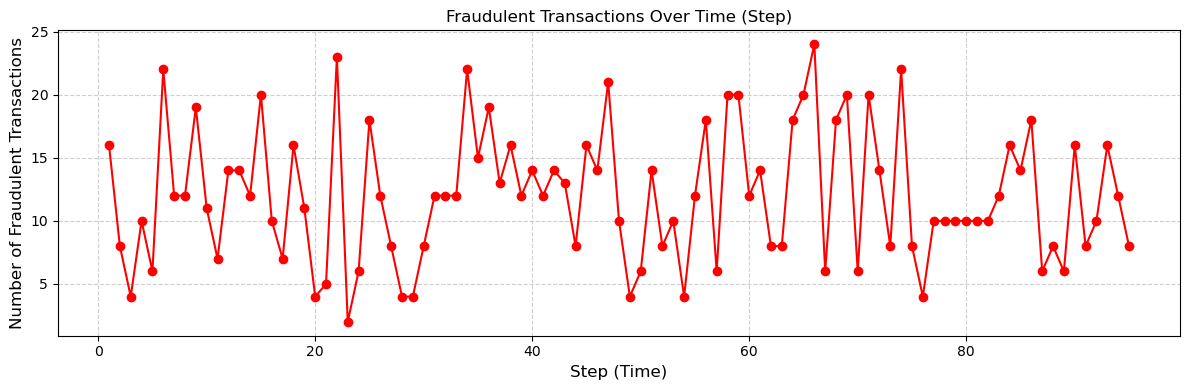

In [102]:
# Grouping by 'step' (time) and summing up the fraud occurrences
fraud_over_time = fd_df[fd_df['isFraud'] == 1].groupby('step')['isFraud'].count()

# Plotting the frequency of fraudulent transactions over time
plt.figure(figsize=(12, 4))
plt.plot(fraud_over_time.index, fraud_over_time.values, marker='o', linestyle='-', color='red')
plt.title('Fraudulent Transactions Over Time (Step)', fontsize=12)
plt.xlabel('Step (Time)', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This graph represents ->  Number of fraudulent transactions over time, using the step column as the timeline.
- X-axis (Step/Time): This shows the unit of time in the real world. In this case 1 step is 1 hour of time.
- Y-axis: (Number of Fraudulent Transactions):Shows the count of fraudulent transactions occurring at each time step.

Insights from the Graph:- 

Fluctuations:frequency of fraud fluctuates significantly over time, with periods of high activity (spikes) and periods of lower activity (dips) .


 <font color='sky blue'>**insight**<font>

- Resulting plot shows the trend of fraudulent transactions over time.
- we can identify periods with spikes in fraudulent activity, which could indicate patterns or anomalies worth further investigation.

##### step - Kernel Density Estimate (KDE) plot

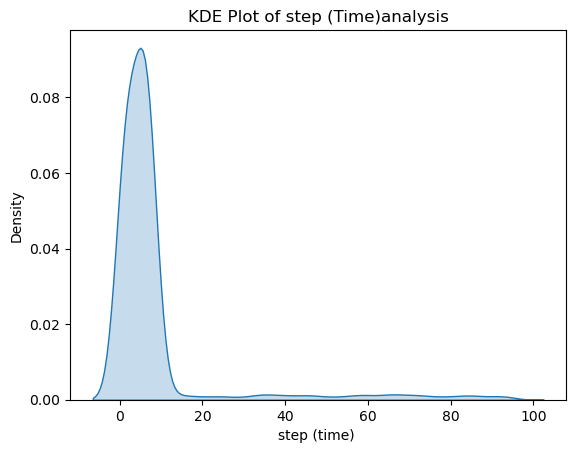

In [107]:
sns.kdeplot(fd_df['step'], fill=True)
plt.title("KDE Plot of step (Time)analysis")
plt.xlabel("step (time) ")
plt.ylabel("Density")
plt.show()

#### Scatter Plot - OldbalamceOrg .


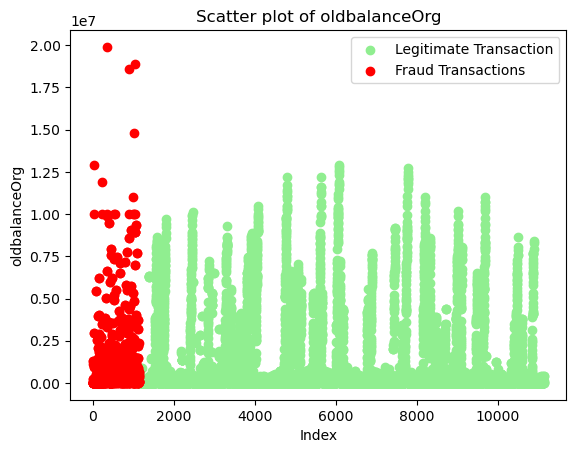

In [109]:
#Scatter Plot of OldbalamceOrg.

plt.scatter(legit_df.index,legit_df['oldbalanceOrg'],color = 'lightgreen',label = 'Legitimate Transaction')
plt.scatter(fraud_df.index,fraud_df['oldbalanceOrg'],color = 'red',label = 'Fraud Transactions')

plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')
plt.title('Scatter plot of oldbalanceOrg')

plt.legend()
plt.show()

### Bivariante analysis

##### Transaction type (typr) Vs Fraud (isfraud) - Bar plot

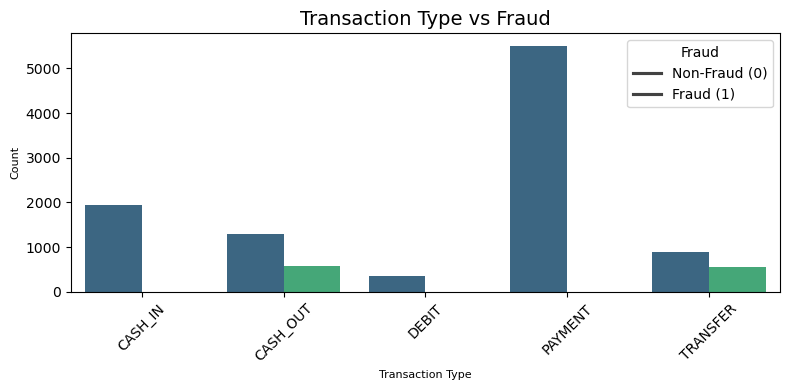

In [114]:
# Group data by transaction type and fraud status
type_vs_fraud = fd_df.groupby(['type', 'isFraud']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='type', y='count', hue='isFraud', data=type_vs_fraud, palette='viridis')

# Add labels and title
plt.title('Transaction Type vs Fraud', fontsize=14)
plt.xlabel('Transaction Type', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.legend(title='Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Help in indentify which type of transwer (eg transfer cash)are more prone to fraudulent

#### Plotting Pairplot
#### Visualizing Numeric variables - against Fraud using ---> Boxplots

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

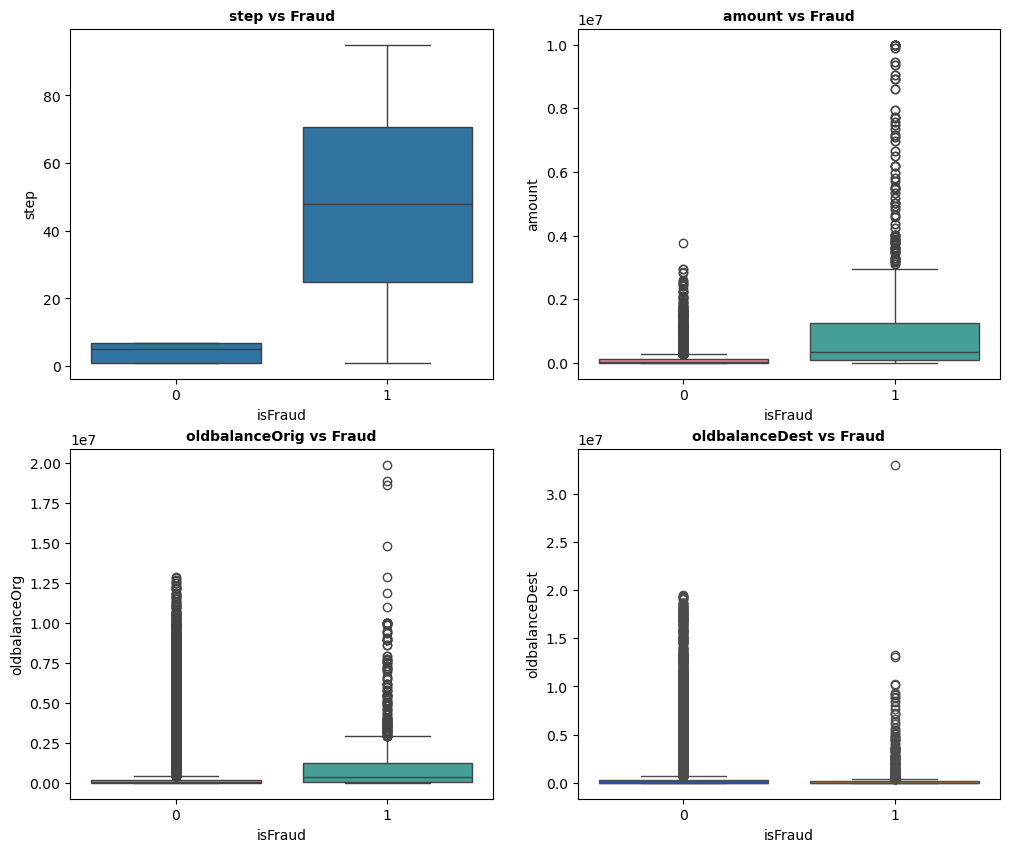

In [117]:
# Plotting Pairplot
#Visualizing Numeric variables against Fraud using Boxplots
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = fd_df)
plt.title('step vs Fraud',fontweight="bold", size=10)

plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = fd_df,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=10)

plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = fd_df, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=10)

plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = fd_df,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=10)

- Median amount for fraud transactions is greater than Non Fraud transactions.
- Balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.

##### transaction Amount(amount) Vs fraud (isfraud) - Box plot

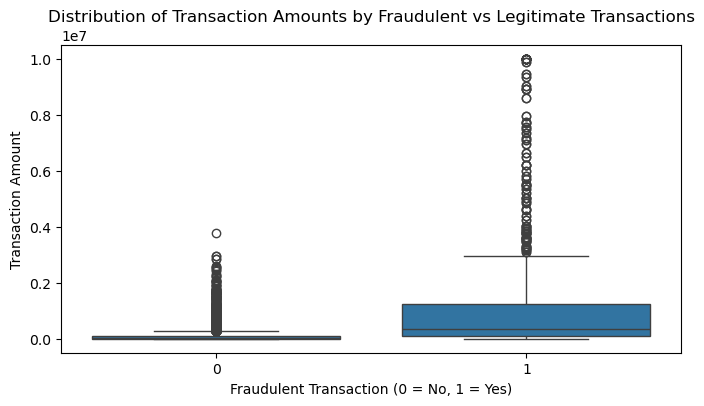

In [121]:
# Create the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='isFraud', y='amount', data=fd_df)

# Set plot labels and title
plt.xlabel('Fraudulent Transaction (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Fraudulent vs Legitimate Transactions')

# Show the plot
plt.show()

##### Balance Features (oldbalanceOrg, newbalanceOrig) vs Fraud (isFraud) - Scatter Plot

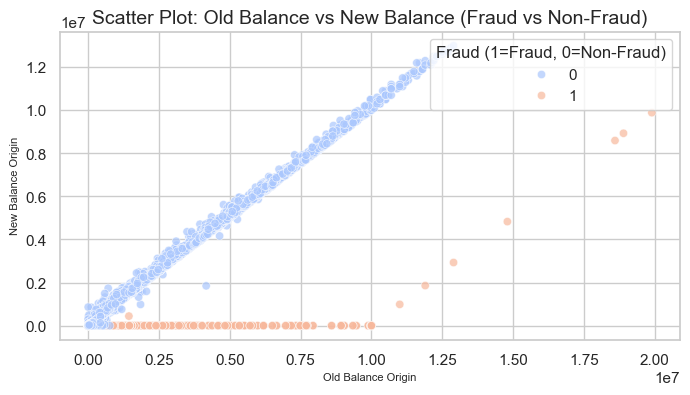

In [124]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=fd_df, palette='coolwarm', alpha=0.7)

# Set plot labels and title
plt.title('Scatter Plot: Old Balance vs New Balance (Fraud vs Non-Fraud)', fontsize=14)
plt.xlabel('Old Balance Origin', fontsize=8)
plt.ylabel('New Balance Origin', fontsize=8)

# Show the plot
plt.legend(title='Fraud (1=Fraud, 0=Non-Fraud)', loc='upper right')
plt.show()

examine whether significant change in balance indicate fraud

##### Time (step) vs Fraud (isFraud) line plot- 

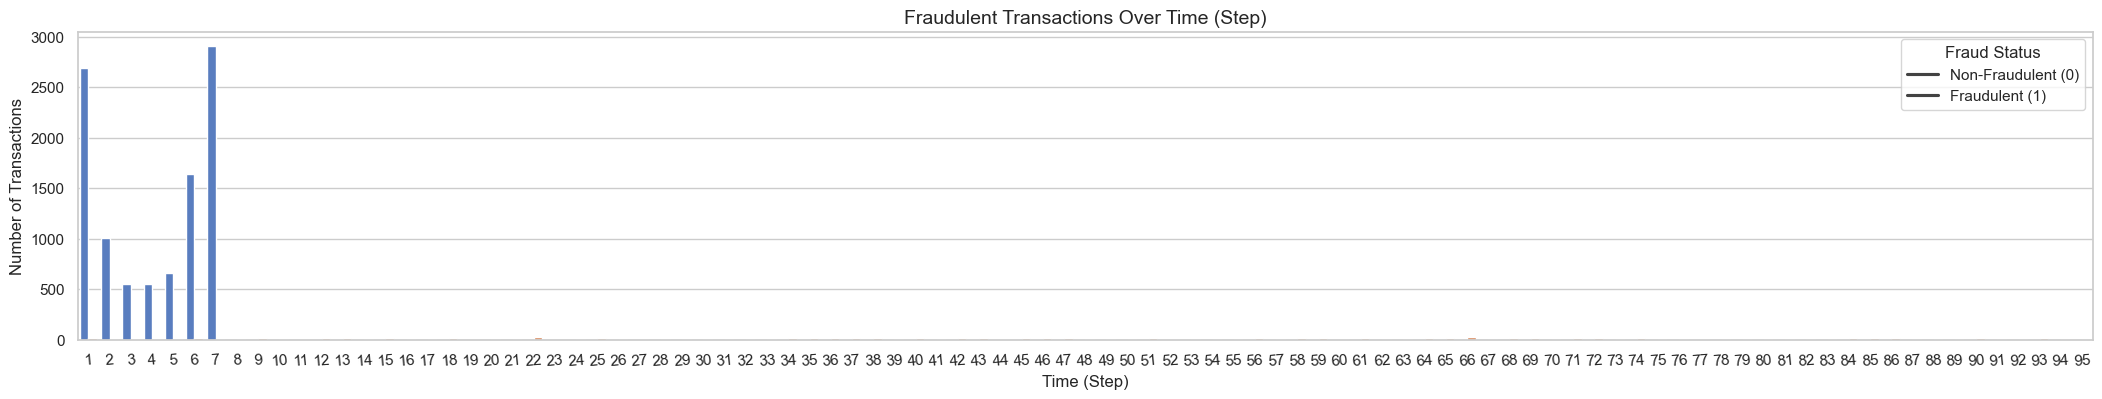

In [130]:
# Group the data by 'step' (time) and 'isFraud' to count the number of occurrences of each combination
fraud_time_data = fd_df.groupby(['step', 'isFraud']).size().reset_index(name='count')

# Create a bar plot using Seaborn to show the count of fraudulent and non-fraudulent transactions over time
plt.figure(figsize=(26, 4))
sns.barplot(x='step', y='count', hue='isFraud', data=fraud_time_data, palette="muted")

# Add labels and title to make the plot clearer
plt.title('Fraudulent Transactions Over Time (Step)', fontsize=14)
plt.xlabel('Time (Step)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=5)  # Rotate x-axis labels for better readability
plt.legend(title='Fraud Status', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])

# Display the plot
plt.show()

This graph is showing that fraudulent and non fraudulent transaction are analyzed on the basis of the steps(time) which is denoting time.
Here -
 - x-axis : x axis showing Step (Time-period).
              : Every step is representing time interval 
 - y-axis :  y axis showing count of Transactions. 
              : This is showing count of transactions happened at the specific time.
Insights- 
 - mostly transactions happening in time(steps) between 1 -10 
 - Fraudulent transactions (in grey bars) are very few , and mostly transactions concentrated on  few time steps.
- Non-fraudulent transactions (black bars) are very high and occurs consistently distributed.

inshort- 
- Data is useful for fraud detection because pattern of  Fraudulent behavior is visible 


##### Balance Features (oldbalanceDest, newbalanceDest) vs Fraud (isFraud)- scatter plot

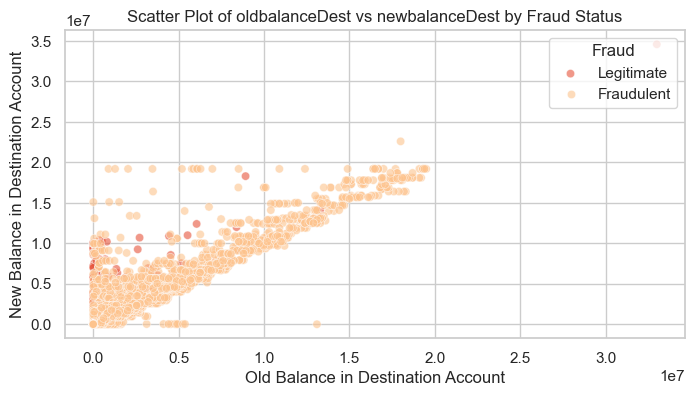

In [135]:
# Scatter plot for oldbalanceDest vs isFraud
plt.figure(figsize=(8, 4))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=fd_df, palette='OrRd', alpha=0.6)
plt.title('Scatter Plot of oldbalanceDest vs newbalanceDest by Fraud Status')
plt.xlabel('Old Balance in Destination Account')
plt.ylabel('New Balance in Destination Account')
plt.legend(title='Fraud', loc='upper right', labels=['Legitimate', 'Fraudulent'])
plt.show()

this graph is called scatter plot , its representiong the relationship of oldbalanceDest or newbalanceDest according to Fraud status.
- X-AXIS: oldbalanceDest (reciever's balance) - initial balance of recipient before the transaction.
- Y-AXIS: newbalanceDest( (reciever's balance) - New balance of recipient after the transaction.
Fraud Status - (isfraud): fraud transaction denoted by 0, legitimate (non- fraud) transaction denoted by 1
- orange points are non fraud transactions
- red points are fraud transactions 

insights: 
- Legitimate Transactions (Orange): are strongly clustered near line , which is showing  strong correlation of  newbalanceDest or oldbalanceDesr  
- it means that after trasactions the balance of destination account is nearly or closely related to initial balance.
- Fraudulent Transactions (Red): fraudulent point are scattered and representing a specific pattern , which is :- 
  - in few cases oldbalanceDest or newbalanceDest accounts balance are low , which is suspicious , which may occur due to fake accounts or dummy balance.

inshort: legitimate transaction balance pattern are predictable and fraud transactions pattern are irregular and unusual  


##### Transaction Amount (amount) vs Time (step) - line plot 

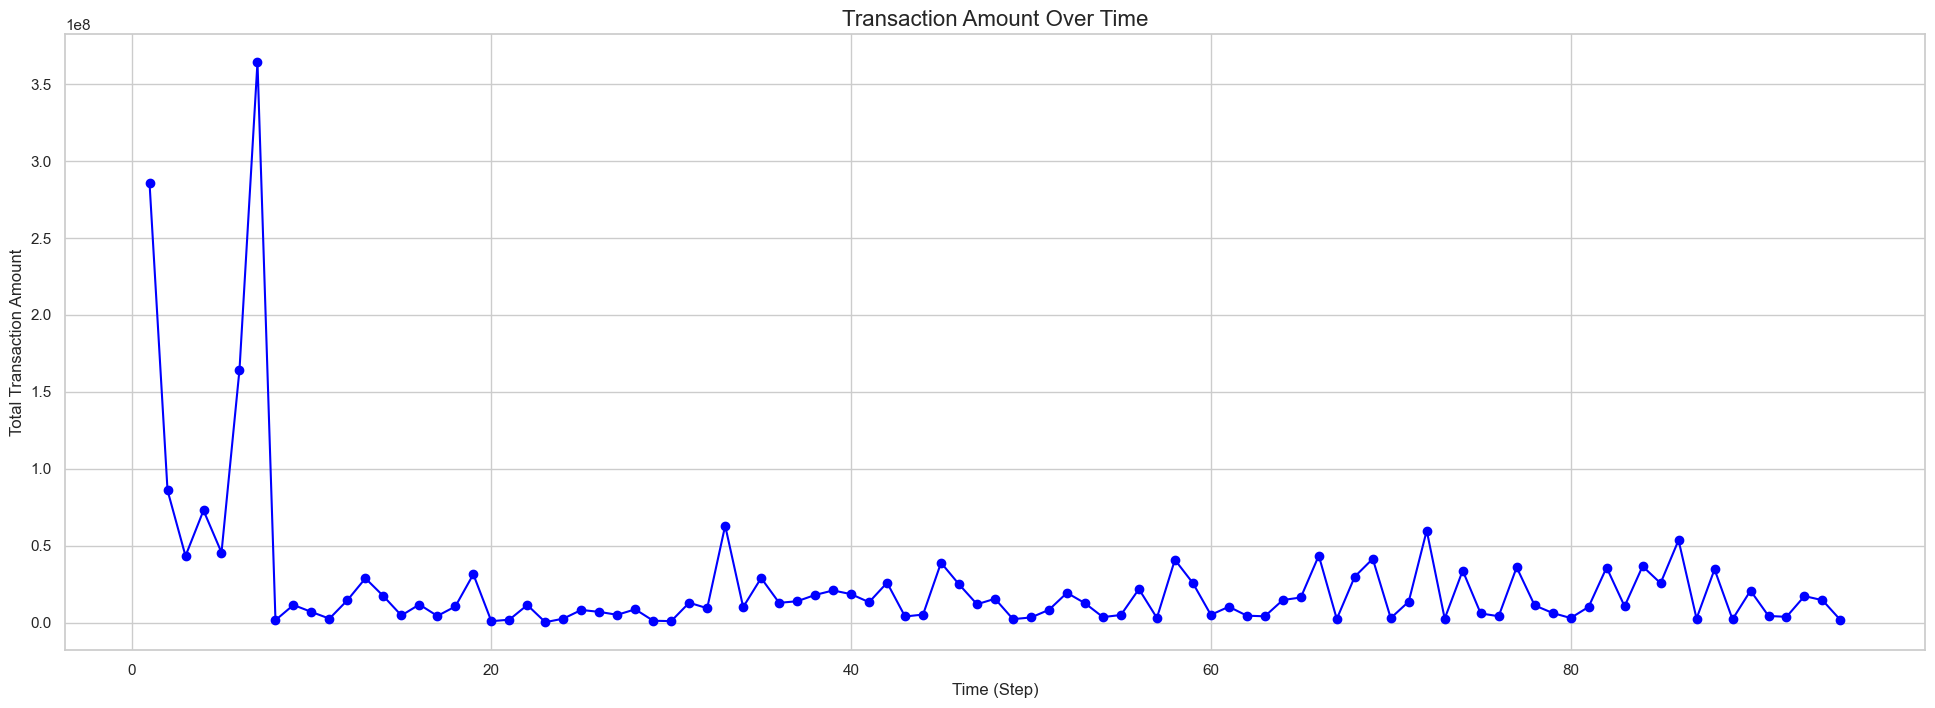

In [142]:
# Group data by 'step' (time) and calculate the total transaction amount per step
transaction_trends = fd_df.groupby('step')['amount'].sum()

# Create a line plot to visualize transaction trends over time
plt.figure(figsize=(24, 8))
plt.plot(transaction_trends.index, transaction_trends.values, color='blue', marker='o')

# Title and labels
plt.title('Transaction Amount Over Time', fontsize=16)
plt.xlabel('Time (Step)', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()

 line plot will help you observe trends in transaction amounts over time.

this graph is representing transaction amount over time.

X axis:
 - step (time) , representing transaction according time.         
 - here,time steps represents that,  1 step is 1 hour of time (min - 1 and max - 95).
          
y axis:
 - Representing total transaction amount , which representing total transaction amount on every time step.

### Balance Features - 

##### Old Balance (oldbalanceOrg, oldbalanceDest)

##### scatter plot

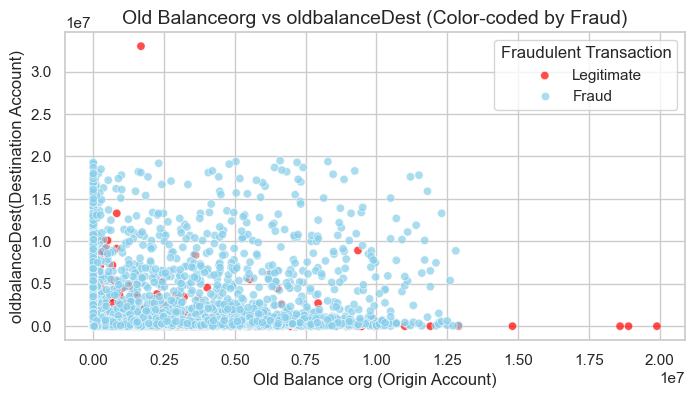

In [149]:
# Create a scatter plot to compare oldbalanceOrg and oldbalanceDest
plt.figure(figsize=(8, 4))

sns.scatterplot(data=fd_df, x='oldbalanceOrg', y='oldbalanceDest', hue='isFraud', 
                palette={0: 'skyblue', 1: 'red'}, alpha=0.7)

# Title and labels
plt.title("Old Balanceorg vs oldbalanceDest (Color-coded by Fraud)", fontsize=14)
plt.xlabel("Old Balance org (Origin Account)", fontsize=12)
plt.ylabel("oldbalanceDest(Destination Account)", fontsize=12)

# Add legend and grid for better clarity
plt.legend(title="Fraudulent Transaction", labels=["Legitimate", "Fraud"])
plt.grid(True)

# Show the plot
plt.show()

##### box plot 

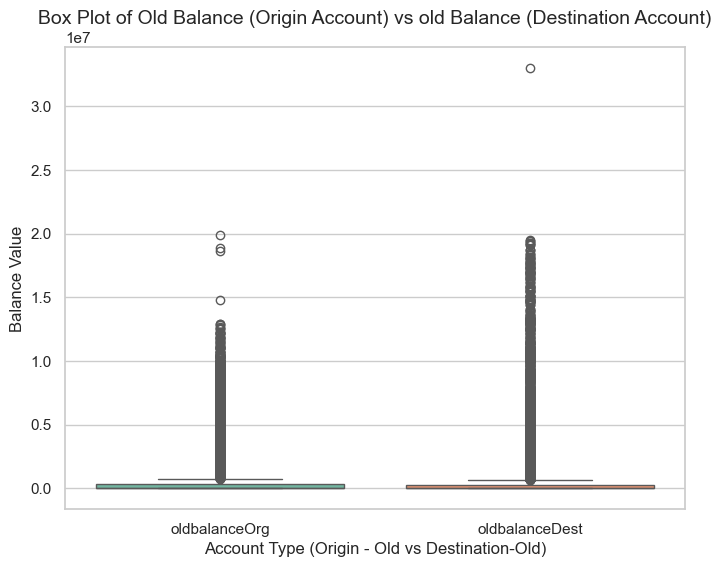

In [151]:
#Create a box plot to visualize the distribution of balances for both origin and destination accounts
plt.figure(figsize=(8,6))


# We will plot oldbalanceOrg and newbalanceOrig to see how the balances change
sns.boxplot(data=fd_df[['oldbalanceOrg', 'oldbalanceDest']], palette='Set2')

# Adding title and labels to the plot for better understanding
plt.title('Box Plot of Old Balance (Origin Account) vs old Balance (Destination Account)', fontsize=14)
plt.ylabel('Balance Value', fontsize=12)
plt.xlabel('Account Type (Origin - Old vs Destination-Old)', fontsize=12)

# Displaying the plot
plt.show()

##### newbalanceOrig and newbalanceDest

##### scatter plot

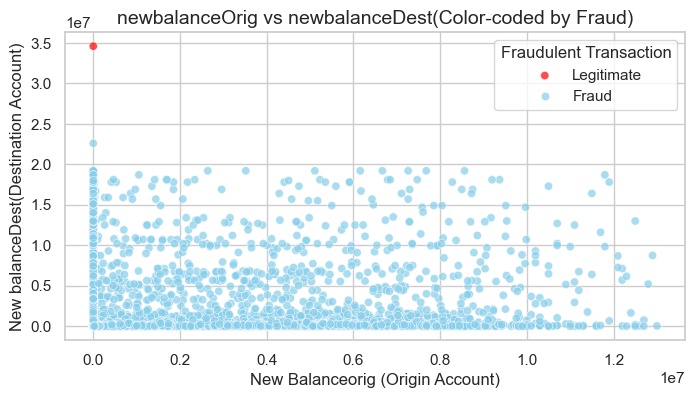

In [157]:
# Create a scatter plot to compare newbalanceOrig and newbalanceDest
plt.figure(figsize=(8, 4))

sns.scatterplot(data=fd_df, x='newbalanceOrig', y='newbalanceDest', hue='isFraud', 
                palette={0: 'skyblue', 1: 'red'}, alpha=0.7)

# Title and labels
plt.title("newbalanceOrig vs newbalanceDest(Color-coded by Fraud)", fontsize=14)
plt.xlabel("New Balanceorig (Origin Account)", fontsize=12)
plt.ylabel("New balanceDest(Destination Account)", fontsize=12)

# Add legend and grid for better clarity
plt.legend(title="Fraudulent Transaction", labels=["Legitimate", "Fraud"])
plt.grid(True)

# Show the plot
plt.show()

##### box plot

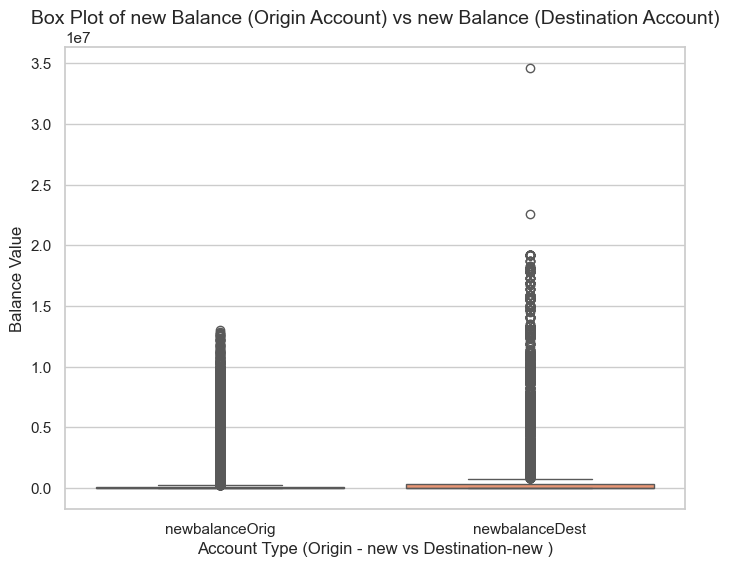

In [160]:
#Create a box plot to visualize the distribution of balances for both origin and destination accounts
plt.figure(figsize=(8,6))


# We will plot newbalanceOrg and newbalanceDest to see how the balances change
sns.boxplot(data=fd_df[['newbalanceOrig', 'newbalanceDest']], palette='Set2')

# Adding title and labels to the plot for better understanding
plt.title('Box Plot of new Balance (Origin Account) vs new Balance (Destination Account)', fontsize=14)
plt.ylabel('Balance Value', fontsize=12)
plt.xlabel('Account Type (Origin - new vs Destination-new )', fontsize=12)

# Displaying the plot
plt.show()

##### oldbalanceOrg and newbalanceOrig

##### Scatter Plot

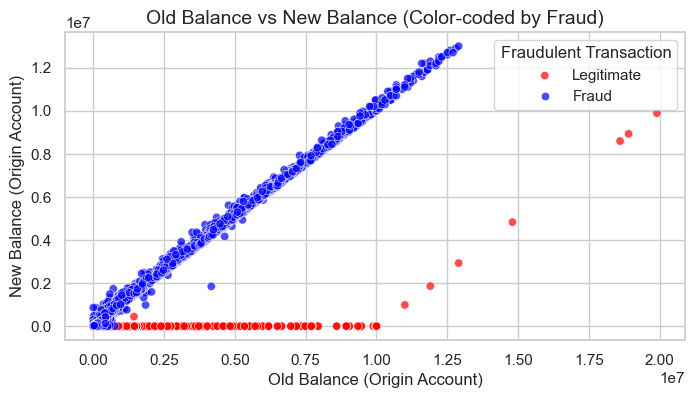

In [164]:
# Create a scatter plot to compare oldbalanceOrg and newbalanceOrig
plt.figure(figsize=(8, 4))

# Scatter plot: oldbalanceOrg vs newbalanceOrig, color-coded by fraud status
sns.scatterplot(data=fd_df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', 
                palette={0: 'blue', 1: 'red'}, alpha=0.7)

# Title and labels
plt.title("Old Balance vs New Balance (Color-coded by Fraud)", fontsize=14)
plt.xlabel("Old Balance (Origin Account)", fontsize=12)
plt.ylabel("New Balance (Origin Account)", fontsize=12)

# Add legend and grid for better clarity
plt.legend(title="Fraudulent Transaction", labels=["Legitimate", "Fraud"])
plt.grid(True)

# Show the plot
plt.show()

- scatter plot helps us quickly see if there's a large gap between the old and new balance values for any transaction.
- there is a significant mismatch between the old and new balances, it could indicate suspicious activity (fraud).
         For instance, a large withdrawal or unexpected deposit might show a wide gap between the old and new balance.

##### box plot 

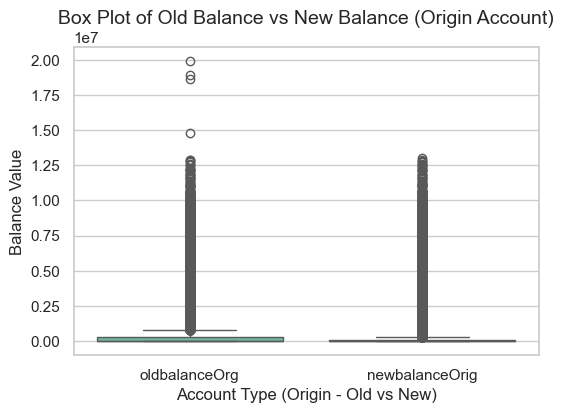

In [169]:
# Create a box plot to visualize the distribution of balances for both origin and destination accounts
plt.figure(figsize=(6, 4))


# We will plot oldbalanceOrg and newbalanceOrig to see how the balances change
sns.boxplot(data=fd_df[['oldbalanceOrg', 'newbalanceOrig']], palette='Set2')

# Adding title and labels to the plot for better understanding
plt.title('Box Plot of Old Balance vs New Balance (Origin Account)', fontsize=14)
plt.ylabel('Balance Value', fontsize=12)
plt.xlabel('Account Type (Origin - Old vs New)', fontsize=12)

# Displaying the plot
plt.show()

##### oldbalanceDest and newbalanceDest

##### scatter plot

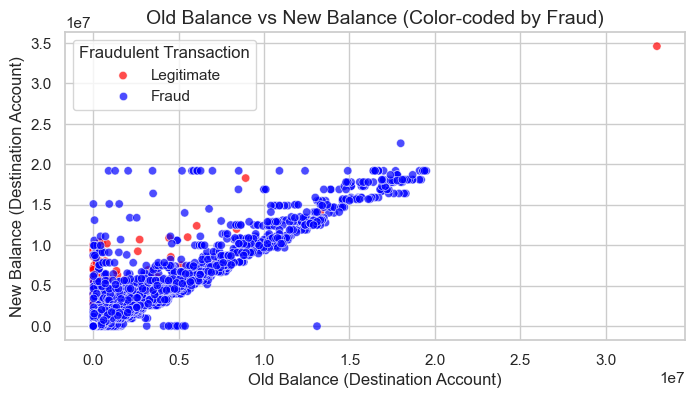

In [172]:
# Create a scatter plot to compare oldbalanceDest and newbalanceDest
plt.figure(figsize=(8, 4))

# Scatter plot: oldbalanceDest vs newbalanceDest, color-coded by fraud status
sns.scatterplot(data=fd_df, x='oldbalanceDest', y='newbalanceDest', hue='isFraud', 
                palette={0: 'blue', 1: 'red'}, alpha=0.7)

# Title and labels
plt.title("Old Balance vs New Balance (Color-coded by Fraud)", fontsize=14)
plt.xlabel("Old Balance (Destination Account)", fontsize=12)
plt.ylabel("New Balance (Destination Account)", fontsize=12)

# Add legend and grid for better clarity
plt.legend(title="Fraudulent Transaction", labels=["Legitimate", "Fraud"])
plt.grid(True)

# Show the plot
plt.show()

##### box plot

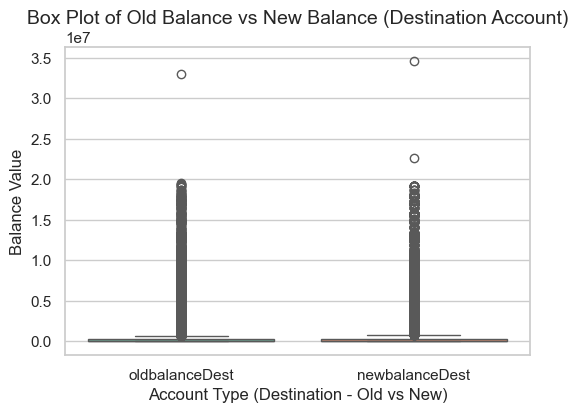

In [175]:
# Create a box plot to visualize the distribution of balances for both origin and destination accounts
plt.figure(figsize=(6, 4))


# We will plot oldbalanceOrg and newbalanceOrig to see how the balances change
sns.boxplot(data=fd_df[['oldbalanceDest','newbalanceDest']], palette='Set2')

# Adding title and labels to the plot for better understanding
plt.title('Box Plot of Old Balance vs New Balance (Destination Account)', fontsize=14)
plt.ylabel('Balance Value', fontsize=12)
plt.xlabel('Account Type (Destination - Old vs New)', fontsize=12)

# Displaying the plot
plt.show()
# we can remove thi outlayers by taking greater than and less than Balance values 

### Problem solving 
## 1) 

In [177]:
fd_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [178]:
# Balance after and before transaction.
wrong_orig_bal = sum(fd_df["oldbalanceOrg"] - fd_df["amount"] != fd_df["newbalanceOrig"])
wrong_dest_bal = sum(fd_df["newbalanceDest"] + fd_df["amount"] !=fd_df["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(fd_df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(fd_df),2))

Percentage of observations with balance errors in the account giving money:  63.0
Percentage of observations with balance errors in the account receiving money:  100.0


## 2)

In [180]:
#2.
obJlist = fd_df.select_dtypes(include="object").columns
print(obJlist)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


### Label Encoding.

In [182]:
#Label Encoding.

#Label Encoding for object datatypes for numeric conversion.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in obJlist:
    fd_df[i] = label_encoder.fit_transform(fd_df[i].astype(str))

print(fd_df.info())
fd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  int32  
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  int32  
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  int32  
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int32(3), int64(2)
memory usage: 740.0 KB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,4,181.0,1751,181.0,0.0,1517,0.0,0.0,1
1,1,1,181.0,10212,181.0,0.0,1338,21182.0,0.0,1
2,1,4,2806.0,2397,2806.0,0.0,1968,0.0,0.0,1
3,1,1,2806.0,6397,2806.0,0.0,8,26202.0,0.0,1
4,1,4,20128.0,2130,20128.0,0.0,867,0.0,0.0,1


##### MULTICOLINEARITY

- Multicolinearity is a statistical phenomenon that occurs when one or more independent variables (predictor variables) show high correlation with each other, i.e. the behavior of one variable is closely related to that of the other variables.
- 
When a model contains variables that are strongly correlated, it can cause problems for the model, especially in regression models. This issue occurs when your independent variables are so closely related that it becomes difficult to separate their effect

Note - Multicollinearity has a negative impact on model reliability and prediction accuracy, so it is important to identify and handle it.s.

<Axes: >

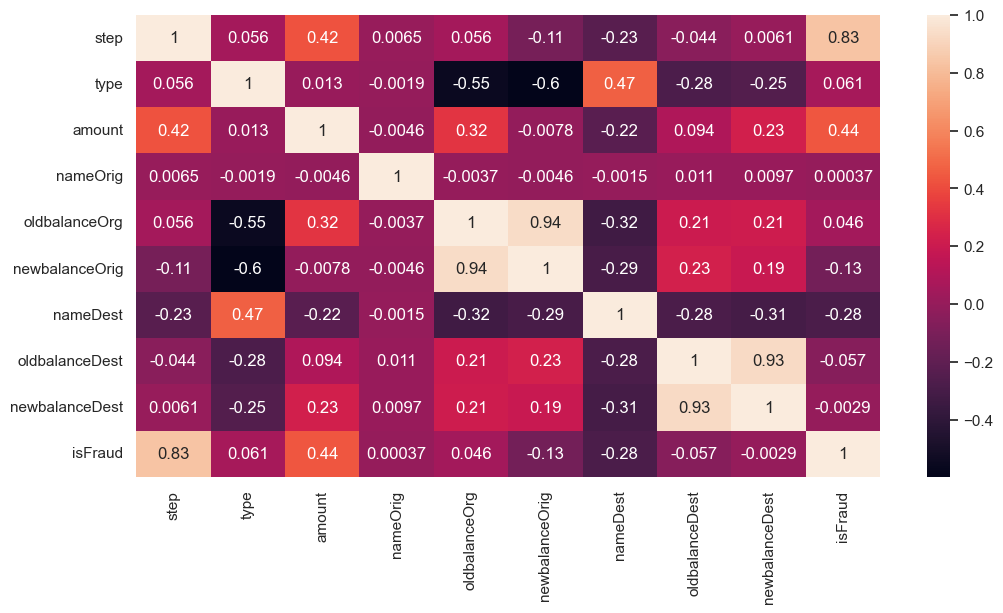

In [184]:
# Multicolinearity.
corr = fd_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

In [185]:
#Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(fd_df):
    vif = pd.DataFrame()
    vif['variables'] = fd_df.columns
    vif['VIF'] = [variance_inflation_factor(fd_df.values , i) for i in range (fd_df.shape[1])]
    return(vif)
    
calc_vif(fd_df)

,variables,VIF
0,step,4.203631
1,type,5.063431
2,amount,14.408480
3,nameOrig,2.998035
4,oldbalanceOrg,127.876791
5,newbalanceOrig,112.229732
6,nameDest,3.979334
7,oldbalanceDest,9.333648
8,newbalanceDest,9.882345
9,isFraud,3.998819


#### New Multicolinearity.

<Axes: >

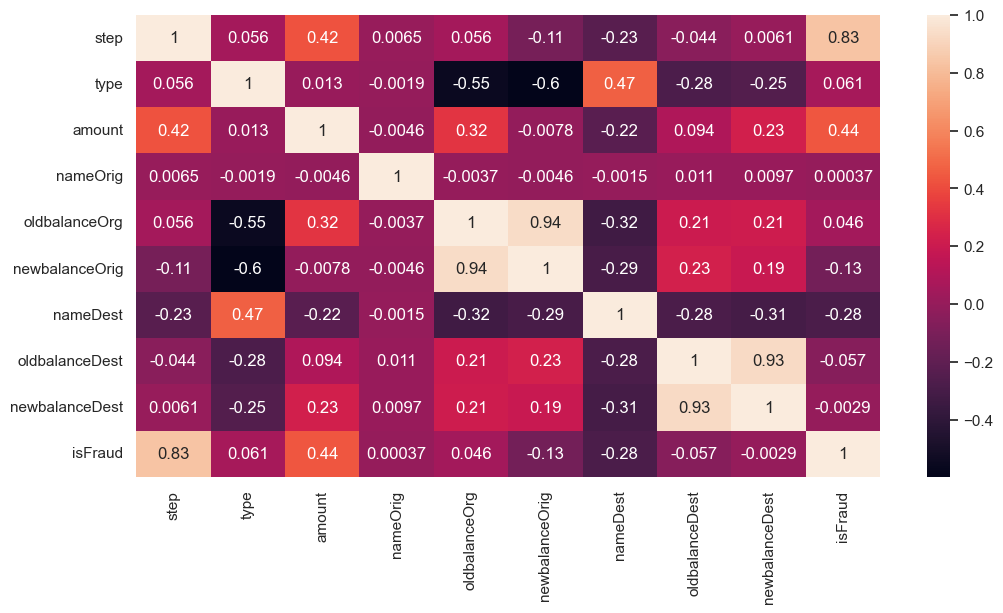

In [188]:
#New Multicolinearity.

corr = fd_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

In [189]:
#Data_new.
fd_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,4,181.0,1751,181.0,0.0,1517,0.0,0.0,1
1,1,1,181.0,10212,181.0,0.0,1338,21182.0,0.0,1
2,1,4,2806.0,2397,2806.0,0.0,1968,0.0,0.0,1
3,1,1,2806.0,6397,2806.0,0.0,8,26202.0,0.0,1
4,1,4,20128.0,2130,20128.0,0.0,867,0.0,0.0,1


### Feature Engineering 

In [191]:
# Create a feature: Transaction difference (old balance vs new balance)
fd_df['diff_balance'] = fd_df['oldbalanceDest'] - fd_df['newbalanceDest']

In [192]:
fd_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diff_balance
0,1,4,181.0,1751,181.0,0.0,1517,0.0,0.0,1,0.0
1,1,1,181.0,10212,181.0,0.0,1338,21182.0,0.0,1,21182.0
2,1,4,2806.0,2397,2806.0,0.0,1968,0.0,0.0,1,0.0
3,1,1,2806.0,6397,2806.0,0.0,8,26202.0,0.0,1,26202.0
4,1,4,20128.0,2130,20128.0,0.0,867,0.0,0.0,1,0.0


In [194]:
# Encode the 'type' column using one-hot encoding
fd_df = pd.get_dummies(fd_df, columns=['type'], drop_first=True)


why we doing Feature engineering -
Helpful for the Fraud detection models 
if difference are unexpected or illogical (negative balance) then it would be suspicious transaction 
Insights- 
- if difference is ZERO- it means that after transaction , No change in the Destination account.
- if difference is POSITIVE. it means that there is a decrement in the Destination  account .
- if difference is NEGATIVE . it means that there is an increment in the Destination account . which is r rate and it an indicator of fraud 

In [196]:
# Drop irrelevant columns (e.g., account names)
fd_df = fd_df.drop(['nameOrig', 'nameDest'], axis=1)

nameOrig :-
Name/ identifier  of transaction source account  (e.g., "C12345"). 

nameDest :-
Name/ identifier of transactions destination account   (e.g., "C67890").

Reasons for drop these columns - 
 - Accounts name or identifiers Numerical are not useful for analysis and these features don't any meaningful contribution for fraud detection model.
 - Account name considered as Personally identifiable information(Pii) which would be removed for data privacy concerns.
  


In [199]:
fd_df.shape

(11142, 12)

### Data Splitting - Train-Test Split 

In [201]:
# Define features (X) and target (y)
X = fd_df.drop('isFraud', axis=1)
y = fd_df['isFraud']   

x(features): 
- Dropped "isfraud" column from dataset and remaining columns assigned as 'x' (input features)
- this feature give input to the model and on the basis of the input model will proceed predictions.

y(target):
- output are he dependent variable which predict specific value,
- like -> 'isFraud' column (binary classification: 0 = Non-Fraud, 1 = Fraud).

In [203]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train and test split completed.")

Train and test split completed.


In [204]:
y_train.value_counts()

isFraud
0    7004
1     795
Name: count, dtype: int64

In [206]:
X_train.value_counts()

step  amount     oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  diff_balance  type_1  type_2  type_3  type_4
1     6.42       18462.78       18456.36        0.00            0.00             0.00         False   False   True    False     1
7     1787.23    95975.00       94187.77        0.00            0.00             0.00         False   False   True    False     1
      2043.74    1257385.05     1255341.31      0.00            0.00             0.00         False   False   True    False     1
      2036.46    0.00           0.00            0.00            0.00             0.00         False   False   True    False     1
      2018.64    2023.23        4.58            0.00            0.00             0.00         False   False   True    False     1
                                                                                                                               ..
3     426.96     75389.00       74962.04        0.00            0.00             0.00         F

In [207]:
X_test.value_counts()

step  amount      oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  diff_balance  type_1  type_2  type_3  type_4
1     13.54       16743.76       16730.22        0.00            0.00             0.00         False   False   True    False     1
7     3421.65     29435.00       26013.35        0.00            0.00             0.00         False   False   True    False     1
      1571.83     0.00           0.00            0.00            0.00             0.00         False   False   True    False     1
      1601.61     239.00         0.00            0.00            0.00             0.00         False   False   True    False     1
      1618.72     258975.85      257357.14       20959.00        22577.72        -1618.72      False   True    False   False     1
                                                                                                                                ..
2     285251.82   0.00           0.00            1319120.27      1116289.38       202830

In [208]:
y_test

6117    0
483     1
8413    0
9902    0
9413    0
       ..
5325    0
9694    0
8024    0
8851    0
1414    0
Name: isFraud, Length: 3343, dtype: int64

## Model Building

### LOGISTIC REGRESSION 

In [212]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42,class_weight={0:1, 1:30})
lr_model.fit(X_train, y_train) 

LogisticRegression(class_weight={0: 1, 1: 30}, max_iter=1000, random_state=42)

In [213]:
# Make Predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

In [215]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[2810  186]
 [   9  338]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      2996
           1       0.65      0.97      0.78       347

    accuracy                           0.94      3343
   macro avg       0.82      0.96      0.87      3343
weighted avg       0.96      0.94      0.95      3343

Accuracy Score: 0.9416691594376309


##### confusion Matrix 

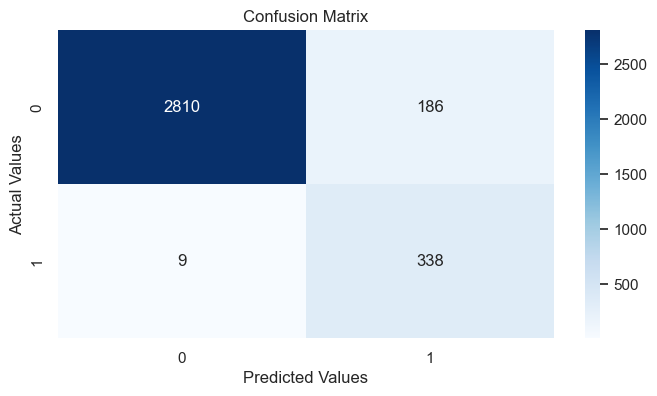

In [217]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Question-> LOGISTIC REGRESSION - What are the potential losses due to model errors ? 

In [389]:
# Define costs for False Positives and False Negatives
cost_false_positive = 9  # Example cost for a false positive
cost_false_negative = 186  # Example cost for a false negative

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate total losses
total_loss = (fp * cost_false_positive) + (fn * cost_false_negative)

print(f"Total Loss Due to Model Errors: ${total_loss}")
print(f"False Positive Loss: ${fp * cost_false_positive}")
print(f"False Negative Loss: ${fn * cost_false_negative}")


Total Loss Due to Model Errors: $7185
False Positive Loss: $6813
False Negative Loss: $372


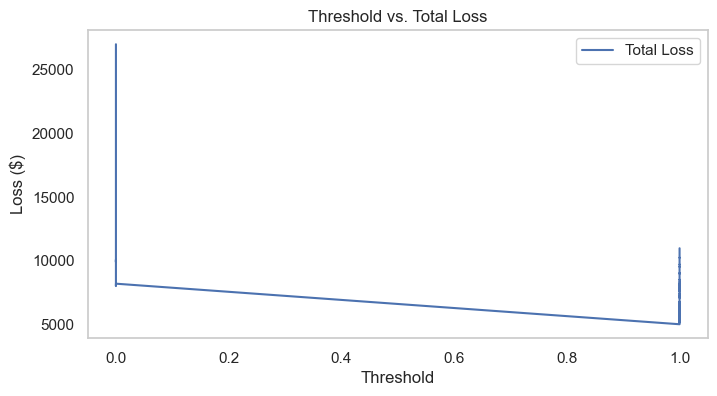

In [391]:
thresholds = []
losses = []

for threshold in roc_curve(y_test, y_scores)[2]:  # Extract thresholds
    y_pred_threshold = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    loss = (fp * cost_false_positive) + (fn * cost_false_negative)
    thresholds.append(threshold)
    losses.append(loss)

plt.figure(figsize=(8, 4))
plt.plot(thresholds, losses, label='Total Loss')
plt.xlabel('Threshold')
plt.ylabel('Loss ($)')
plt.title('Threshold vs. Total Loss')
plt.legend()
plt.grid()
plt.show()

##### Precision-Recall Curve

In [397]:
# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


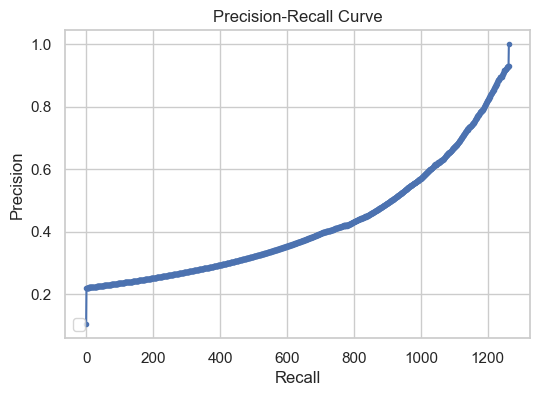

In [399]:
# Plot Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(precision, marker='.',color='b') #,label=f'={average_precision:.2f})
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show() 

##### Roc-Auc Curve 

In [11]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# # Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Model')  # Diagonal line
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid() 

NameError: name 'roc_curve' is not defined

### RandomForest Classifier

In [308]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=1000, class_weight={0:1, 1:50} ,max_depth=3,max_features=8)  
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 50}, max_depth=3, max_features=8,
                       n_estimators=1000, random_state=42)

In [309]:
X.shape 

(11142, 11)

In [310]:
# Evaluate the model
y_pred = rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)

In [311]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [312]:
# Print evaluation metrics
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[2928   68]
 [   7  340]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2996
           1       0.83      0.98      0.90       347

    accuracy                           0.98      3343
   macro avg       0.92      0.98      0.94      3343
weighted avg       0.98      0.98      0.98      3343

Accuracy: 0.9775650613221657


In [318]:
rf_model.feature_importances_

array([6.36786780e-01, 6.12453892e-03, 4.30582701e-02, 1.06264892e-01,
       3.93870190e-02, 1.47497775e-02, 4.41088304e-03, 1.07984677e-02,
       4.42154688e-05, 1.14538079e-01, 2.38370777e-02])

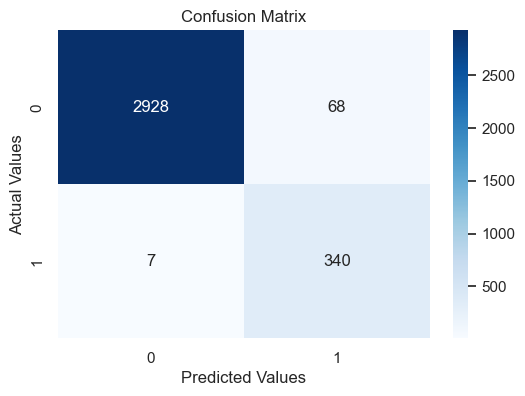

In [320]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Question-> RandomForest Classifier - What are the potential losses due to model errors ? 

In [420]:
# Define costs for False Positives and False Negatives
cost_false_positive = 7  # Example cost for a false positive
cost_false_negative = 68  # Example cost for a false negative

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate total losses
total_loss = (fp * cost_false_positive) + (fn * cost_false_negative)

print(f"Total Loss Due to Model Errors: ${total_loss}")
print(f"False Positive Loss: ${fp * cost_false_positive}")
print(f"False Negative Loss: ${fn * cost_false_negative}")

Total Loss Due to Model Errors: $5435
False Positive Loss: $5299
False Negative Loss: $136


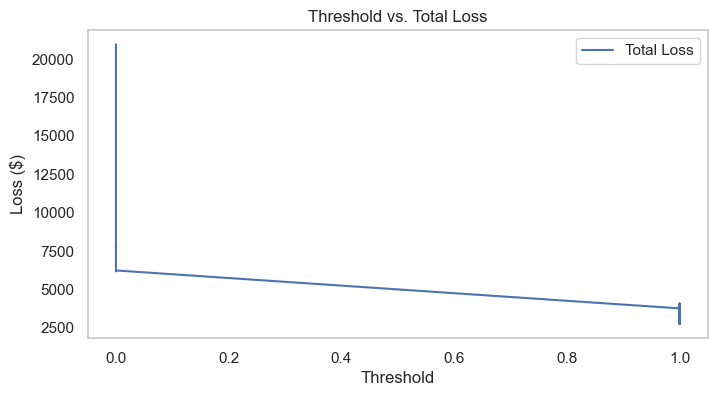

In [416]:
thresholds = []
losses = []

for threshold in roc_curve(y_test, y_scores)[2]:  # Extract thresholds
    y_pred_threshold = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    loss = (fp * cost_false_positive) + (fn * cost_false_negative)
    thresholds.append(threshold)
    losses.append(loss)

plt.figure(figsize=(8, 4))
plt.plot(thresholds, losses, label='Total Loss')
plt.xlabel('Threshold')
plt.ylabel('Loss ($)')
plt.title('Threshold vs. Total Loss')
plt.legend()
plt.grid()
plt.show()

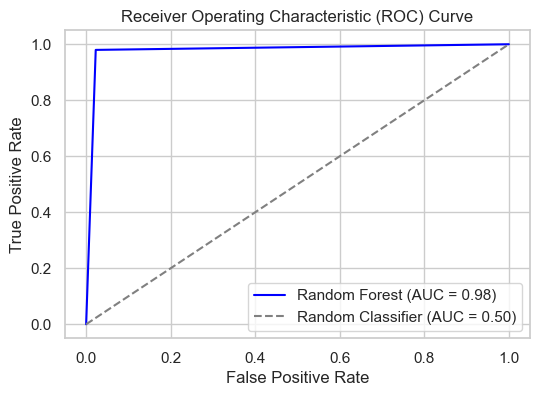

In [322]:
# # Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### XG Booster Classifier

In [1]:
from xgboost import XGBClassifier
import pandas as pd

In [2]:
fd_df=pd.read_csv("E:\onedrive world\OneDrive\Desktop\CAPSTONE PROJECT -BIA\FRAUD DETECTION - DATASET\Fraud_Detection\Fraud_Analysis_Dataset.csv")
fd_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\LOQ\AppData\Local\Temp\ipykernel_8960\2698693669.py:1: SyntaxWarning: invalid escape sequence '\o'
  fd_df=pd.read_csv("E:\onedrive world\OneDrive\Desktop\CAPSTONE PROJECT -BIA\FRAUD DETECTION - DATASET\Fraud_Detection\Fraud_Analysis_Dataset.csv")


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fd_df[['step', 'amount']], fd_df['isFraud'], test_size=0.2)

In [4]:
print(X_train.shape)
print(y_train.shape)

(8913, 2)
(8913,)


In [5]:
# Train and evaluate Gradient Boosting 
xgb_model = XGBClassifier(random_state=42,n_estimators=100,max_depth=2,learning_rate= 0.01)
xgb_model.fit(X_train, y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [326]:
y_pred_xgb = xgb_model.predict(X_test)
y_scores = xgb_model.predict_proba(X_test)[:, 1]
print("XGBoost:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy)

XGBoost:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2996
           1       0.83      0.98      0.90       347

    accuracy                           0.98      3343
   macro avg       0.92      0.98      0.94      3343
weighted avg       0.98      0.98      0.98      3343

Accuracy: 0.9775650613221657


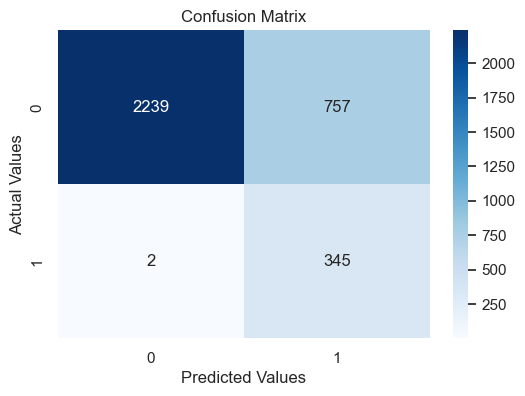

In [418]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Question-> XG Booster Classifier - What are the potential losses due to model errors ? 

In [449]:
# Define costs for False Positives and False Negatives
cost_false_positive = 2  # Example cost for a false positive
cost_false_negative = 757  # Example cost for a false negative

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate total losses
total_loss = (fp * cost_false_positive) + (fn * cost_false_negative)

print(f"Total Loss Due to Model Errors: ${total_loss}")
print(f"False Positive Loss: ${fp * cost_false_positive}")
print(f"False Negative Loss: ${fn * cost_false_negative}")

Total Loss Due to Model Errors: $34065
False Positive Loss: $0
False Negative Loss: $34065


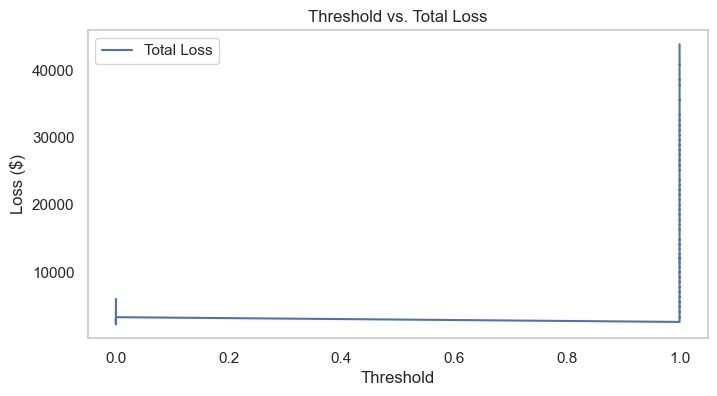

In [425]:
thresholds = []
losses = []

for threshold in roc_curve(y_test, y_scores)[2]:  # Extract thresholds
    y_pred_threshold = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    loss = (fp * cost_false_positive) + (fn * cost_false_negative)
    thresholds.append(threshold)
    losses.append(loss)

plt.figure(figsize=(8, 4))
plt.plot(thresholds, losses, label='Total Loss')
plt.xlabel('Threshold')
plt.ylabel('Loss ($)')
plt.title('Threshold vs. Total Loss')
plt.legend()
plt.grid()
plt.show()

##### Feature Importance Plot 

<Figure size 1000x800 with 0 Axes>

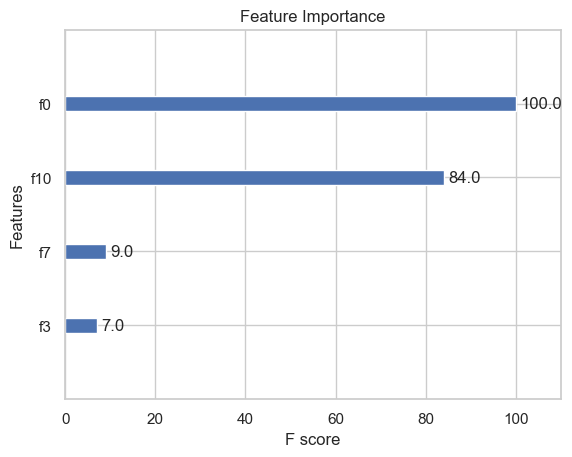

In [328]:
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10, importance_type='weight')  # Top 10 features
plt.title("Feature Importance")
plt.show()

#### Support Vector Machine (SVM) 

In [436]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [438]:
# Initialize and train the SVM classifier
svm_classifier = SVC(
    kernel='rbf',              # Use the RBF kernel (works well in most cases)
    C=1.0,                     # Regularization parameter
    probability=True,          # Enable probability estimates for AUC computation
    max_iter=-1,
    random_state=42)

svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [440]:
# Make predictions
y_pred = svm_classifier.predict(X_test)
y_scores = svm_classifier.predict_proba(X_test)[:, 1]  # Probability of class 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

In [442]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc * 100:.2f}%") 

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2996
           1       1.00      0.87      0.93       347

    accuracy                           0.99      3343
   macro avg       0.99      0.94      0.96      3343
weighted avg       0.99      0.99      0.99      3343

Confusion Matrix:
[[2996    0]
 [  45  302]]
Accuracy: 98.65%
AUC: 93.52%


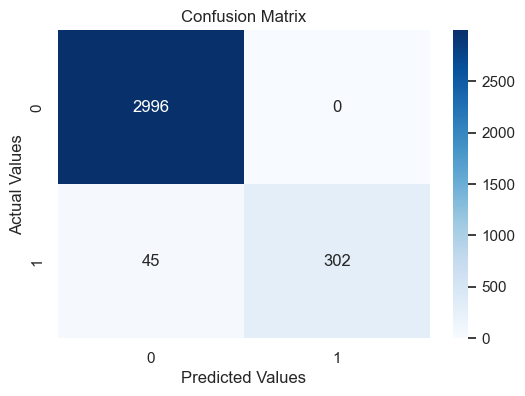

In [444]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Question-> Support Vector Machine (SVM) - What are the potential losses due to model errors ?

In [451]:
# Define costs for False Positives and False Negatives
cost_false_positive = 45  # Example cost for a false positive
cost_false_negative = 0  # Example cost for a false negative

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate total losses
total_loss = (fp * cost_false_positive) + (fn * cost_false_negative)

print(f"Total Loss Due to Model Errors: ${total_loss}")
print(f"False Positive Loss: ${fp * cost_false_positive}")
print(f"False Negative Loss: ${fn * cost_false_negative}")

Total Loss Due to Model Errors: $0
False Positive Loss: $0
False Negative Loss: $0


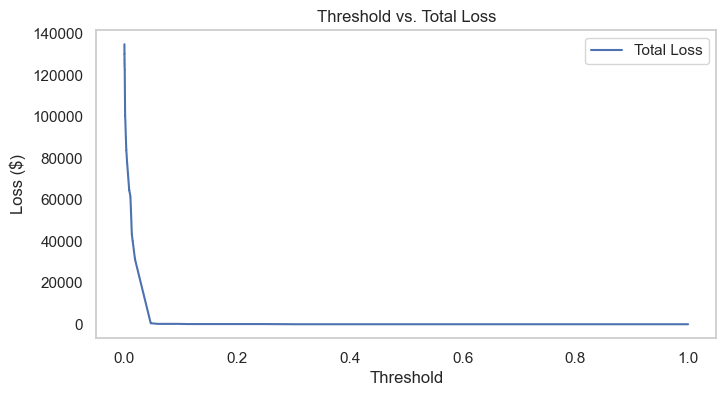

In [453]:
thresholds = []
losses = []

for threshold in roc_curve(y_test, y_scores)[2]:  # Extract thresholds
    y_pred_threshold = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    loss = (fp * cost_false_positive) + (fn * cost_false_negative)
    thresholds.append(threshold)
    losses.append(loss)
 
plt.figure(figsize=(8, 4))
plt.plot(thresholds, losses, label='Total Loss')
plt.xlabel('Threshold')
plt.ylabel('Loss ($)')
plt.title('Threshold vs. Total Loss')
plt.legend()
plt.grid()
plt.show()

##### Precision-Recall curve

In [342]:
# # Assuming y_test contains the true labels and y_scores contains the predicted probabilities for the positive class
# # Calculate precision and recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
# -
# # Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

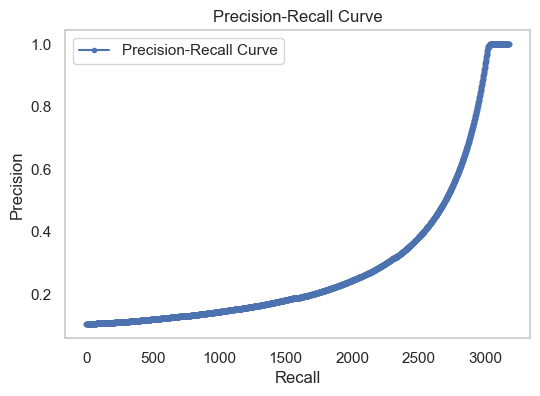

In [344]:
# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show() 

##### ROC curve

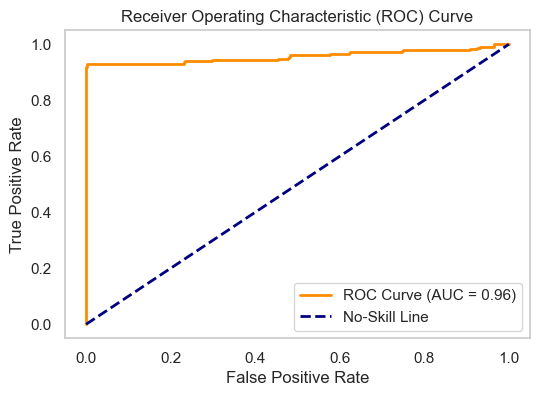

In [347]:
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### K-Nearest Neighbour (KNN) model

In [351]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)  # You can tune 'n_neighbors' for optimal performance
knn_model.fit(X_train, y_train)    

KNeighborsClassifier(n_neighbors=7)

In [353]:
# Predict the target on the test set
y_pred = knn_model.predict(X_test)
y_scores = knn_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

<Axes: >

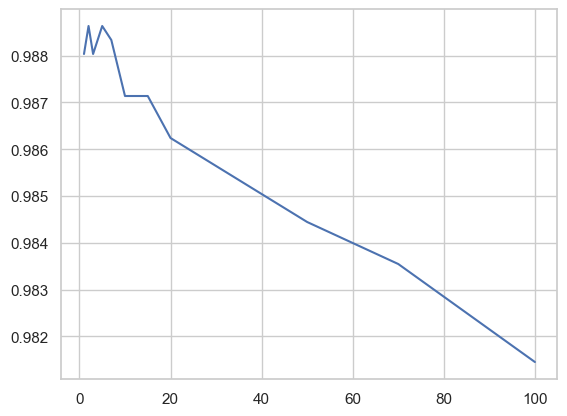

In [354]:
test_auc_list = []
k_list = [1, 2, 3, 4, 5, 7, 10, 12, 15, 20, 50, 70, 100]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_auc_list.append(accuracy_score(y_test, y_pred))
    
sns.lineplot(x=k_list, y=test_auc_list)

In [355]:
train_acc = knn.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 98.2177202205411


In [357]:
y_pred = knn.predict(X_test)
probs = knn.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 98.14537840263236


In [358]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2996
           1       1.00      0.82      0.90       347

    accuracy                           0.98      3343
   macro avg       0.99      0.91      0.95      3343
weighted avg       0.98      0.98      0.98      3343

Confusion Matrix:
[[2996    0]
 [  62  285]]


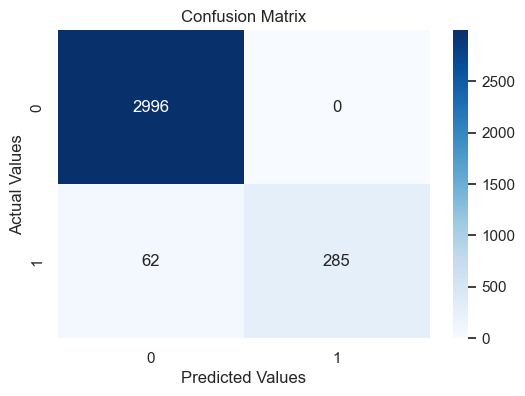

In [359]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Question-> K-Nearest Neighbour (KNN) model - What are the potential losses due to model errors ?

In [456]:
# Define costs for False Positives and False Negatives
cost_false_positive = 62 # Example cost for a false positive
cost_false_negative = 0  # Example cost for a false negative

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate total losses
total_loss = (fp * cost_false_positive) + (fn * cost_false_negative)

print(f"Total Loss Due to Model Errors: ${total_loss}")
print(f"False Positive Loss: ${fp * cost_false_positive}")
print(f"False Negative Loss: ${fn * cost_false_negative}")

Total Loss Due to Model Errors: $0
False Positive Loss: $0
False Negative Loss: $0


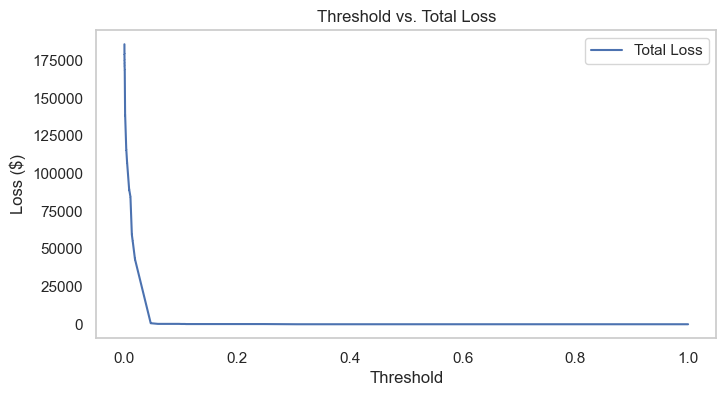

In [458]:
thresholds = []
losses = []

for threshold in roc_curve(y_test, y_scores)[2]:  # Extract thresholds
    y_pred_threshold = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    loss = (fp * cost_false_positive) + (fn * cost_false_negative)
    thresholds.append(threshold)
    losses.append(loss)

plt.figure(figsize=(8, 4))
plt.plot(thresholds, losses, label='Total Loss')
plt.xlabel('Threshold')
plt.ylabel('Loss ($)')
plt.title('Threshold vs. Total Loss')
plt.legend()
plt.grid()
plt.show()

In [360]:
# # # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr) 

##### ROC Curve

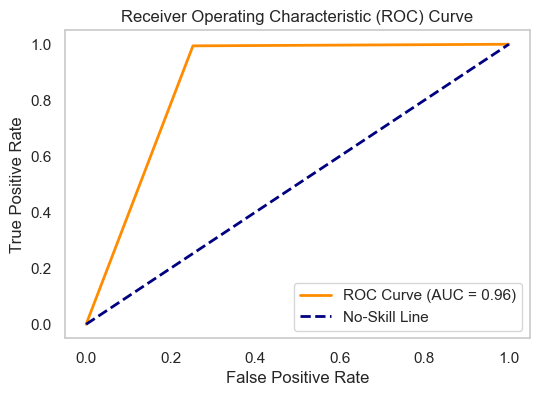

In [460]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


##### Precision-Recall Curve

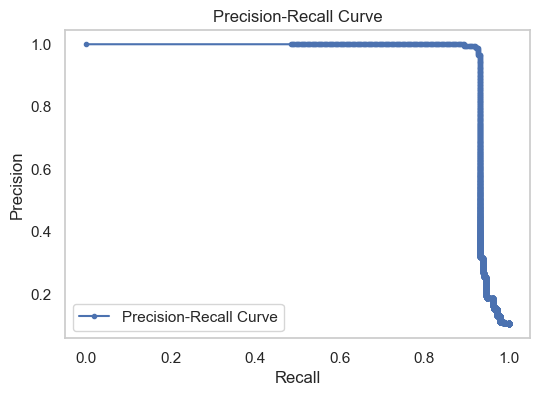

In [463]:
# Plot Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

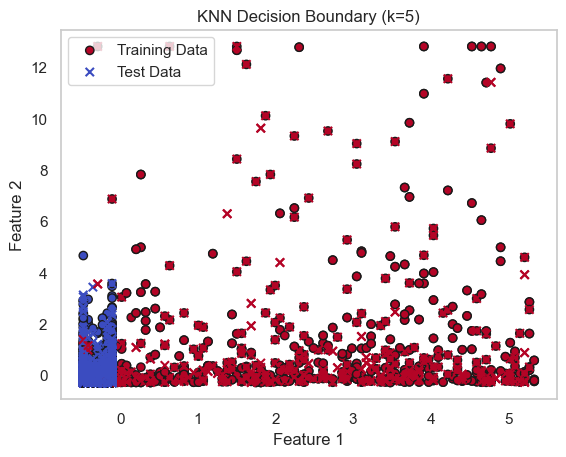

In [465]:
# Overlay the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label="Test Data")

plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### Naive Bayes Classifier

In [470]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)
  

GaussianNB()

In [472]:
# Predict the target on the test set
y_pred = nb_model.predict(X_test)
y_scores = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [474]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      2996
           1       0.31      0.99      0.48       347

    accuracy                           0.77      3343
   macro avg       0.66      0.87      0.67      3343
weighted avg       0.93      0.77      0.82      3343

Confusion Matrix:
[[2239  757]
 [   2  345]]


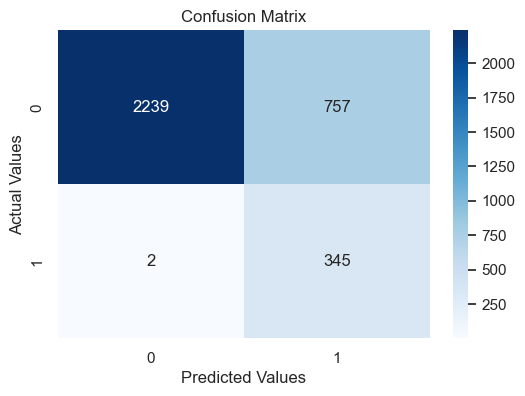

In [476]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Question-> Naive Bayes Classifier - What are the potential losses due to model errors ?

In [482]:
# Define costs for False Positives and False Negatives
cost_false_positive = 2 # Example cost for a false positive
cost_false_negative = 757  # Example cost for a false negative

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate total losses
total_loss = (fp * cost_false_positive) + (fn * cost_false_negative)

print(f"Total Loss Due to Model Errors: ${total_loss}")
print(f"False Positive Loss: ${fp * cost_false_positive}")
print(f"False Negative Loss: ${fn * cost_false_negative}")

Total Loss Due to Model Errors: $3028
False Positive Loss: $1514
False Negative Loss: $1514


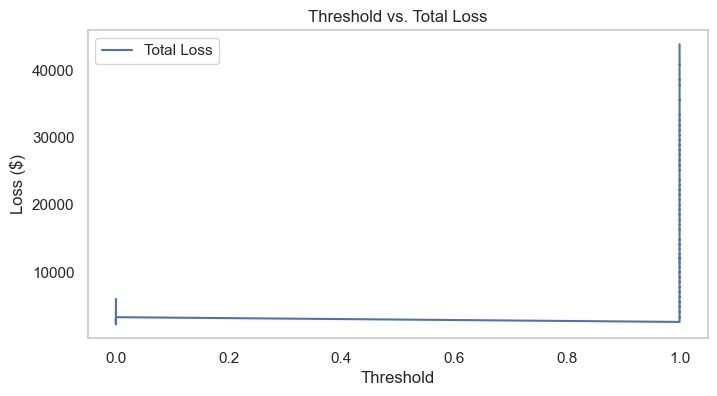

In [484]:
thresholds = []
losses = []

for threshold in roc_curve(y_test, y_scores)[2]:  # Extract thresholds
    y_pred_threshold = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    loss = (fp * cost_false_positive) + (fn * cost_false_negative)
    thresholds.append(threshold)
    losses.append(loss)

plt.figure(figsize=(8, 4))
plt.plot(thresholds, losses, label='Total Loss')
plt.xlabel('Threshold')
plt.ylabel('Loss ($)')
plt.title('Threshold vs. Total Loss')
plt.legend()
plt.grid()
plt.show()

In [370]:
# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# roc_auc = auc(fpr, tpr)

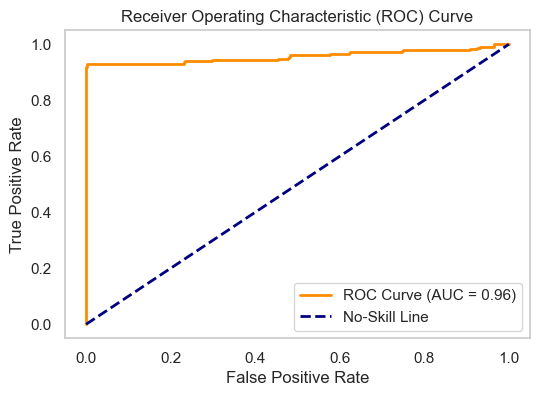

In [371]:
# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

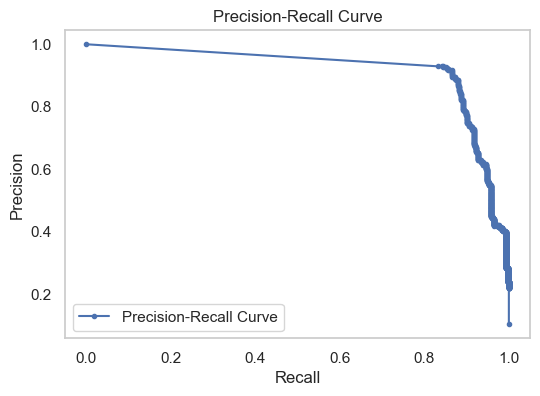

In [372]:

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

#### Decision Tree 

In [256]:
dtree = DecisionTreeClassifier(max_depth=3, criterion='entropy',class_weight={0:1, 1:20},min_samples_split=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 20}, criterion='entropy',
                       max_depth=3, min_samples_split=3)

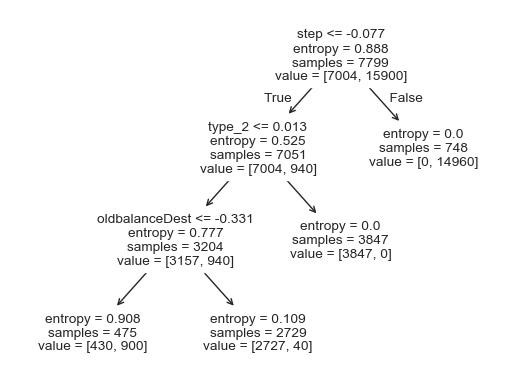

In [257]:
# tree.plot_tree(dtree, feature_names=X_train.columns) 
# plt.show()
tree.plot_tree(dtree, feature_names=fd_df.columns)
plt.show()

In [259]:
train_acc = dtree.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 94.46082831132196


In [260]:
y_pred = dtree.predict(X_test)
probs = dtree.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 94.37630870475621


In [486]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store results
results = {}

# Loop through each model, train and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy, precision, recall, and f1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results in a dictionary for each model    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert results dictionary into a DataFrame
results_df = pd.DataFrame(results).T

# Sort results by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display the comparison of models
print(results_df)



                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.996111   1.000000  0.962536  0.980910
XGBoost              0.996111   1.000000  0.962536  0.980910
Decision Tree        0.995513   0.997006  0.959654  0.977974
KNN                  0.988633   0.987382  0.902017  0.942771
Logistic Regression  0.987137   1.000000  0.876081  0.933948
SVM                  0.986539   1.000000  0.870317  0.930663
Naive Bayes          0.772958   0.313067  0.994236  0.476190


### Question - What is the model's precision and accuracy in detecting fraudulent transactions?
 - Result - Above are the results